
🔍 **Column Check Report** 🔍

✔️ Found Columns (9):
   - Clone
   - T
   - G
   - Gln
   - Xv
   - L
   - V
   - MAb
   - rep

❌ Missing Columns (2):
   - Xd
   - rP

⚠️ WARNING: Some expected columns are missing. Analysis may be impacted.

**Cleaned Data Head:**


,Clone,Time (days),Viable Cells (cells/mL),Viability (%),Glucose (g/L),Lactate (g/L),Glutamine (mmol/L),Glutamate (mmol/L),Antibody Concentration (mg/mL),Replicate
0,B,0,284000.0,100.0,7.419121,0.004255,5.575516,1.821962,0.0,1
1,B,0,288000.0,100.0,7.515516,0.004507,5.572859,1.811074,0.0,2
2,B,0,278000.0,100.0,7.804288,0.004333,5.487487,1.702079,0.0,3
3,C,0,302000.0,100.0,8.031550,0.004320,5.988051,1.876903,0.0,1
4,C,0,298000.0,100.0,6.737842,0.003946,5.339700,1.918827,0.0,2



🔍 **DataFrame Overview** 🔍


,Time (days),Viable Cells (cells/mL),Viability (%),Glucose (g/L),Lactate (g/L),Glutamine (mmol/L),Glutamate (mmol/L),Antibody Concentration (mg/mL),Replicate
count,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2.500000,3.939361e+06,98.881025,5.890798,1.454910,3.927452,2.110923,0.194444,2.000000
std,1.732051,5.154712e+06,1.169398,1.440266,1.296267,2.016669,0.304433,0.282230,0.828079
min,0.000000,2.780000e+05,95.580111,2.926359,0.003946,0.720759,1.415042,0.000000,1.000000
25%,1.000000,5.537500e+05,98.377193,5.183903,0.475177,1.647744,1.871917,0.000000,1.000000
50%,2.500000,1.670000e+06,99.067554,6.310566,1.040931,4.910447,2.099733,0.070000,2.000000
75%,4.000000,3.087500e+06,100.000000,6.802176,2.391654,5.554329,2.328466,0.300000,3.000000
max,5.000000,1.600000e+07,100.000000,8.031550,5.010467,6.526645,2.761856,1.000000,3.000000



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Clone                           36 non-null     category
 1   Time (days)                     36 non-null     int64   
 2   Viable Cells (cells/mL)         36 non-null     float64 
 3   Viability (%)                   36 non-null     float64 
 4   Glucose (g/L)                   36 non-null     float64 
 5   Lactate (g/L)                   36 non-null     float64 
 6   Glutamine (mmol/L)              36 non-null     float64 
 7   Glutamate (mmol/L)              36 non-null     float64 
 8   Antibody Concentration (mg/mL)  36 non-null     float64 
 9   Replicate                       36 non-null     int64   
dtypes: category(1), float64(7), int64(2)
memory usage: 2.8 KB

--- Generating Individual Kinetic Plots ---


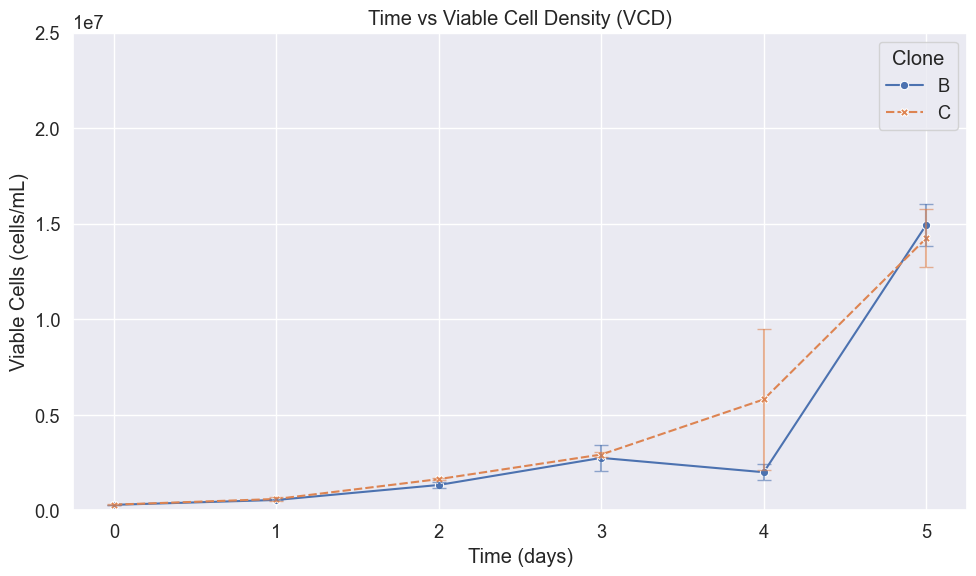

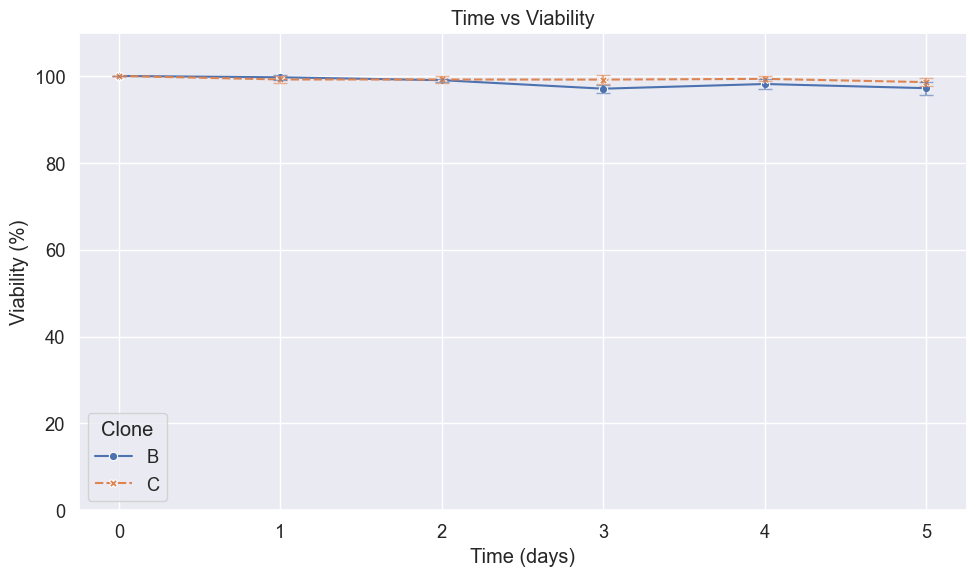

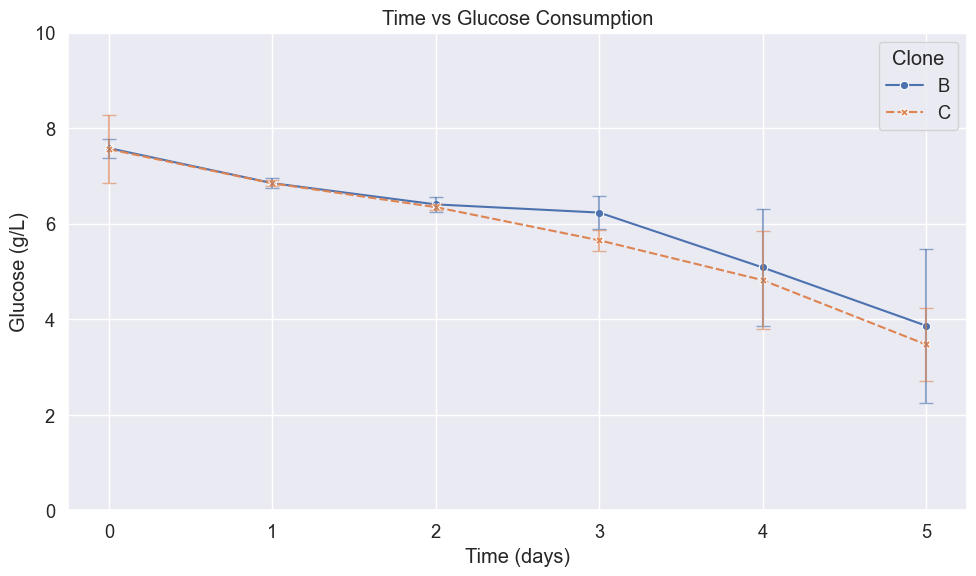

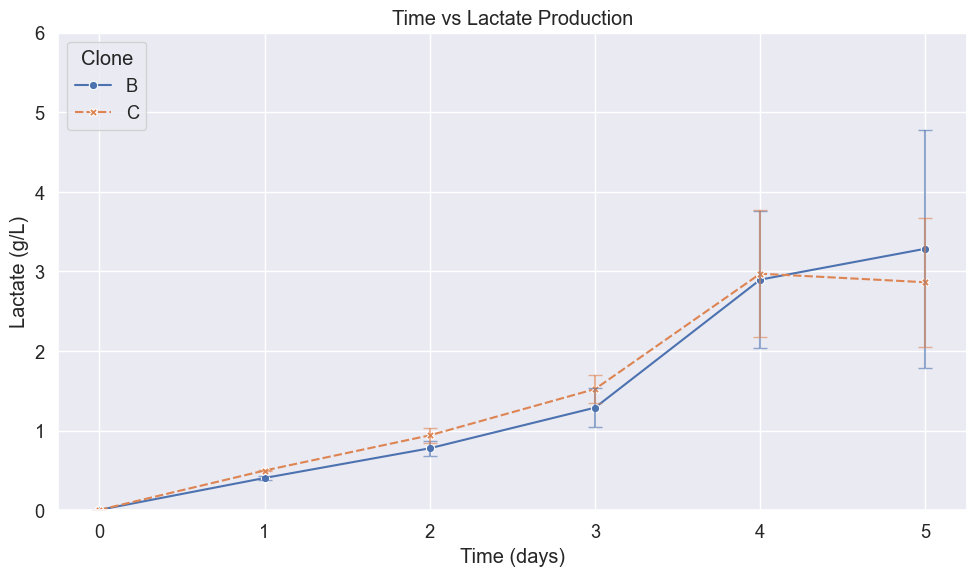

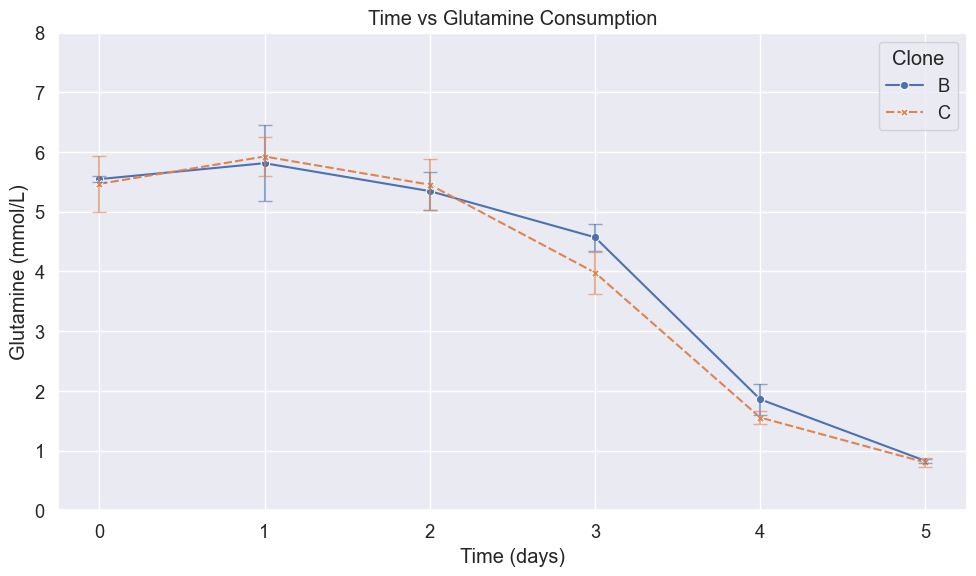

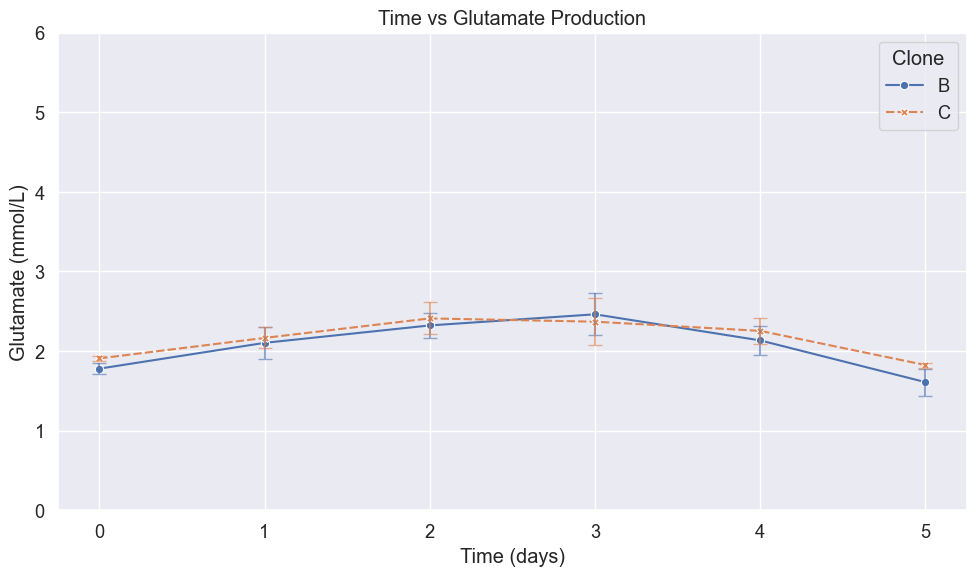

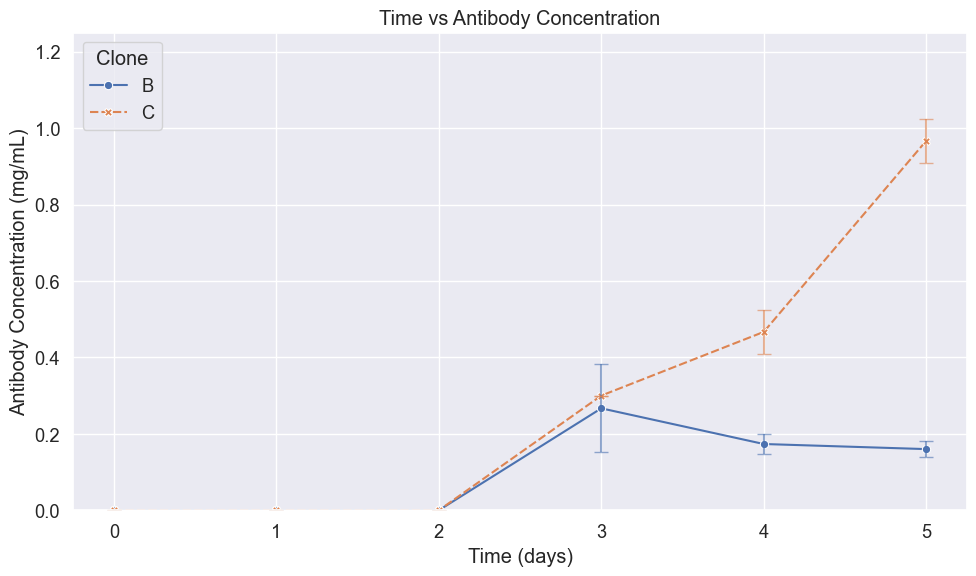


✅ All individual plots have been generated and saved to the 'figures' directory.

--- Generating Combined (Dual Y-Axis) Plots ---


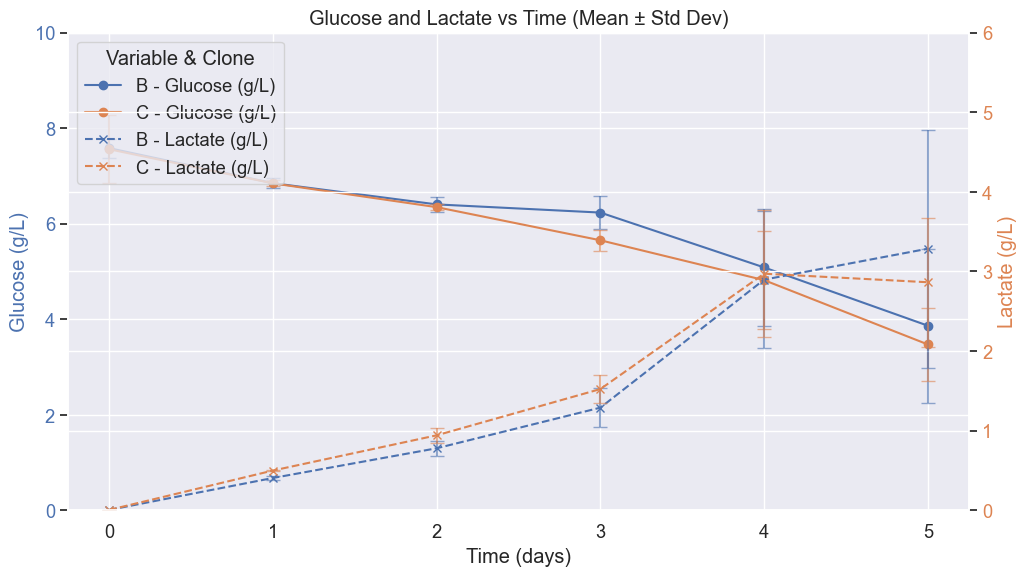

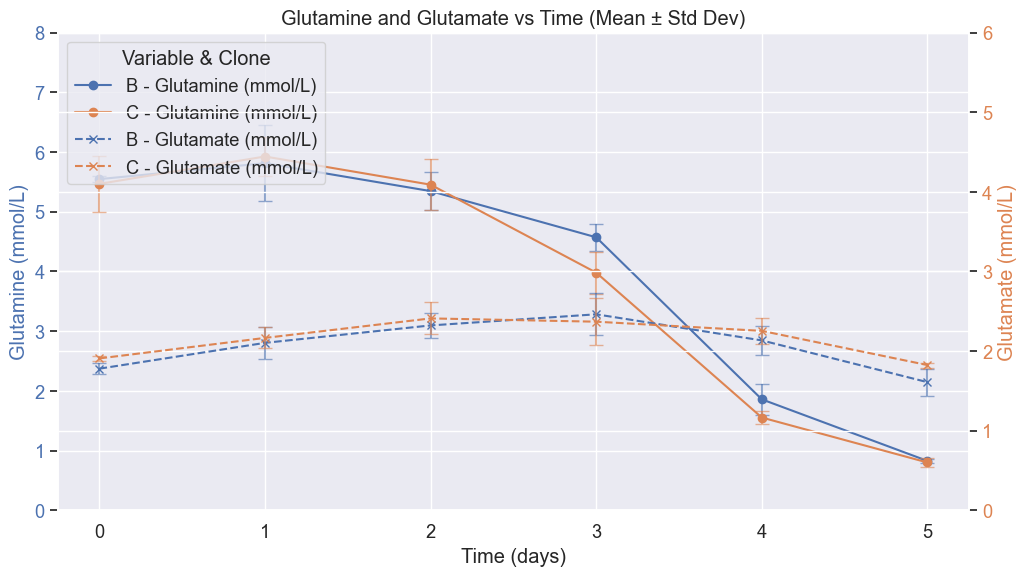

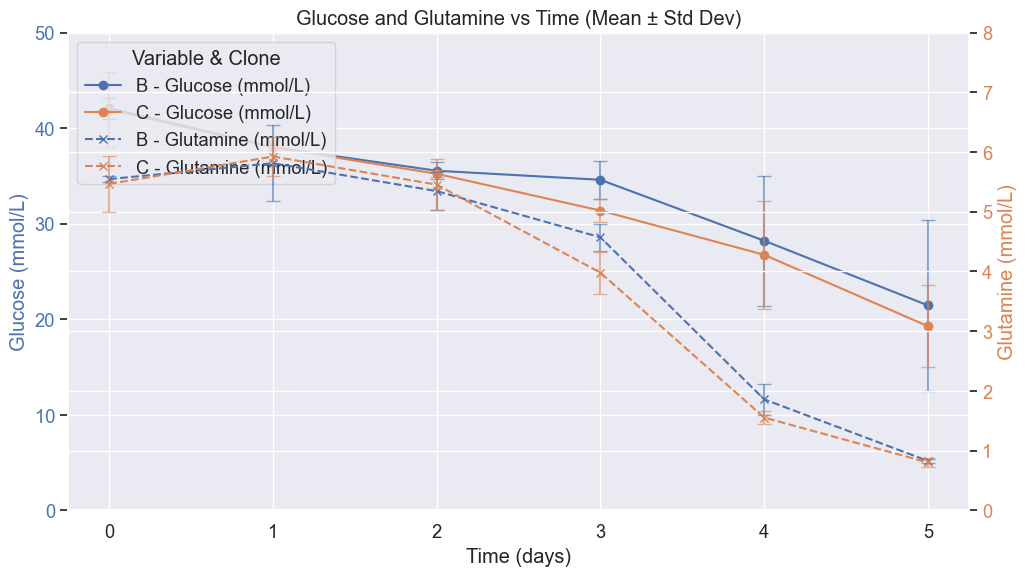

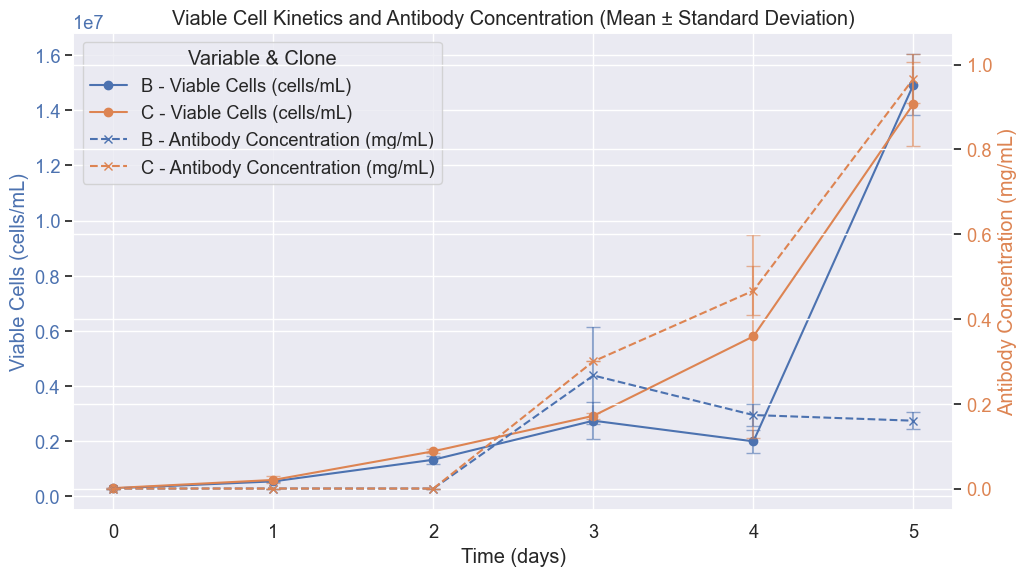


✅ All combined plots have been generated and saved to the 'figures' directory.

--- Análisis de Fase Exponencial: Usando datos de 0 a 5 días ---

**Parámetros Cinéticos y Estequiométricos Calculados por Cada Réplica:**


,Clone,Replicate,"Specific Growth Rate (mu, d^-1)","Biomass Yield (Yx/G, cells/L/mmol)","Biomass Yield (Yx/Gln, cells/L/mmol)","Average Glucose Rate (dG/dt, mmol/L/day)","Average Glutamine Rate (dGln/dt, mmol/L/day)","Average Glutamate Rate (dGlu/dt, mmol/L/day)","Average Lactate Rate (dL/dt, mmol/L/day)","Specific Glucose Consumption (qG, mmol/cell·day)","Specific Glutamine Consumption (qGln, mmol/cell·day)","Specific Glutamate Production (qGlu, mmol/cell·day)","Specific Lactate Production (qL, mmol/cell·day)"
0,B,1,0.661347,5.431178e+08,2.829660e+09,-4.977189,-0.955309,-0.019146,5.270535,7.067863e-10,1.356588e-10,2.718839e-12,7.484430e-10
1,B,2,0.726165,5.776579e+08,3.127132e+09,-5.093673,-0.940926,-0.025171,5.466243,6.663622e-10,1.230934e-10,3.292943e-12,7.151025e-10
2,B,3,0.704728,1.363942e+09,3.362481e+09,-2.305377,-0.935143,-0.057407,11.114862,2.832507e-10,1.148965e-10,7.053380e-12,1.365630e-09
3,C,1,0.636858,5.976331e+08,2.315801e+09,-4.082103,-1.053458,-0.016387,8.419321,6.377290e-10,1.645771e-10,2.559995e-12,1.315313e-09
4,C,2,0.788557,7.493544e+08,3.304390e+09,-4.003980,-0.908004,-0.020024,5.391555,5.133966e-10,1.164257e-10,2.567561e-12,6.913136e-10
5,C,3,0.819519,5.293345e+08,3.488943e+09,-5.523162,-0.837962,-0.013704,5.236106,7.275935e-10,1.103888e-10,1.805312e-12,6.897781e-10



**Parámetros Cinéticos y Estequiométricos por Clona (Promedio ± Desviación Estándar):**


,Clone,"Specific Growth Rate (mu, d^-1)","Specific Growth Rate (mu, d^-1)_std","Biomass Yield (Yx/G, cells/L/mmol)","Biomass Yield (Yx/G, cells/L/mmol)_std","Biomass Yield (Yx/Gln, cells/L/mmol)","Biomass Yield (Yx/Gln, cells/L/mmol)_std","Average Glucose Rate (dG/dt, mmol/L/day)","Average Glucose Rate (dG/dt, mmol/L/day)_std","Average Glutamine Rate (dGln/dt, mmol/L/day)",...,"Average Lactate Rate (dL/dt, mmol/L/day)","Average Lactate Rate (dL/dt, mmol/L/day)_std","Specific Glucose Consumption (qG, mmol/cell·day)","Specific Glucose Consumption (qG, mmol/cell·day)_std","Specific Glutamine Consumption (qGln, mmol/cell·day)","Specific Glutamine Consumption (qGln, mmol/cell·day)_std","Specific Glutamate Production (qGlu, mmol/cell·day)","Specific Glutamate Production (qGlu, mmol/cell·day)_std","Specific Lactate Production (qL, mmol/cell·day)","Specific Lactate Production (qL, mmol/cell·day)_std"
0,B,0.697413,0.033022,8.282391e+08,4.642533e+08,3.106425e+09,2.670131e+08,-4.125413,1.577273,-0.943793,...,7.283880,3.31917,5.521330e-10,2.337345e-10,1.245496e-10,1.045743e-11,4.355054e-12,2.354384e-12,9.430585e-10,3.663371e-10
1,C,0.748311,0.097755,6.254407e+08,1.126150e+08,3.036378e+09,6.308233e+08,-4.536415,0.855440,-0.933141,...,6.348994,1.79464,6.262397e-10,1.075597e-10,1.304639e-10,2.969674e-11,2.310956e-12,4.379166e-13,8.988017e-10,3.607106e-10



Información del DataFrame de Parámetros Cinéticos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 23 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Clone                                                     2 non-null      object 
 1   Specific Growth Rate (mu, d^-1)                           2 non-null      float64
 2   Specific Growth Rate (mu, d^-1)_std                       2 non-null      float64
 3   Biomass Yield (Yx/G, cells/L/mmol)                        2 non-null      float64
 4   Biomass Yield (Yx/G, cells/L/mmol)_std                    2 non-null      float64
 5   Biomass Yield (Yx/Gln, cells/L/mmol)                      2 non-null      float64
 6   Biomass Yield (Yx/Gln, cells/L/mmol)_std                  2 non-null      float64
 7   Average Glucose Rate (dG/dt, mmol/L/day)                  2

C:\Users\ebald\AppData\Local\Temp\ipykernel_2588\1638763632.py:686: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


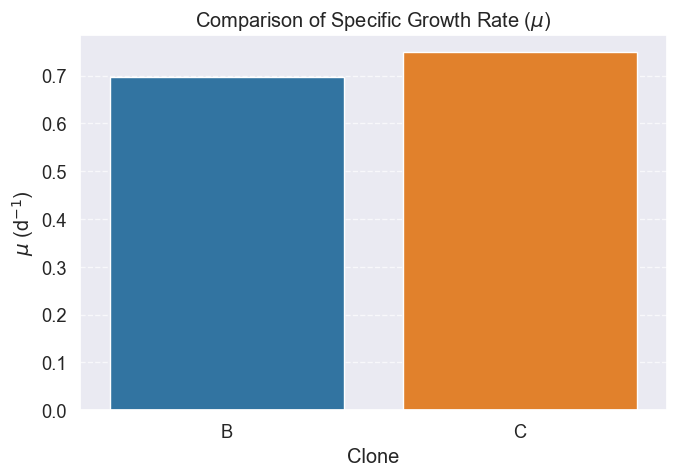

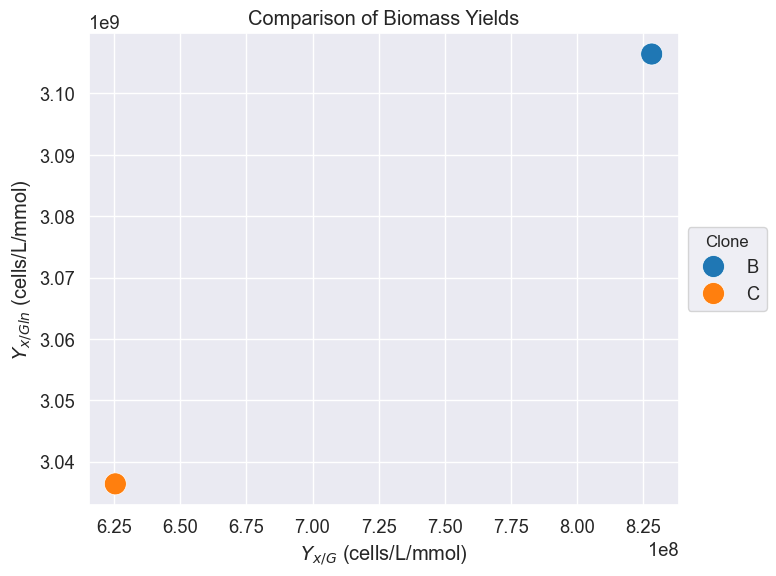

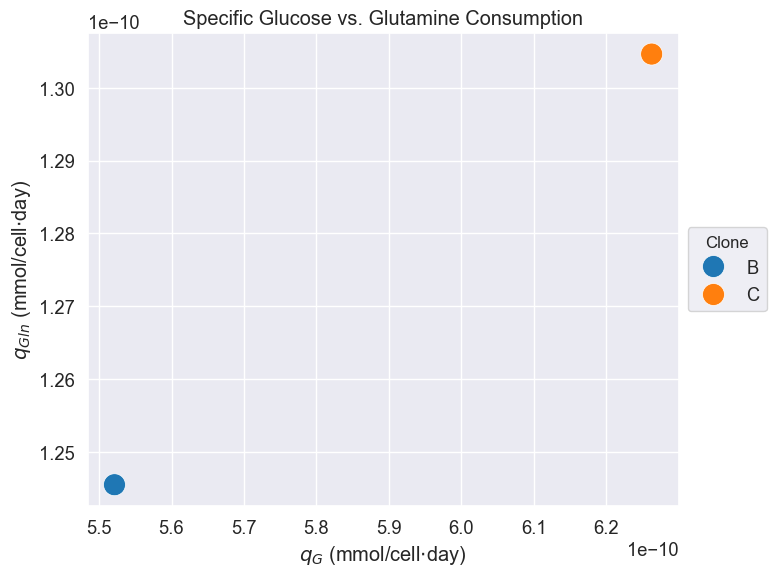

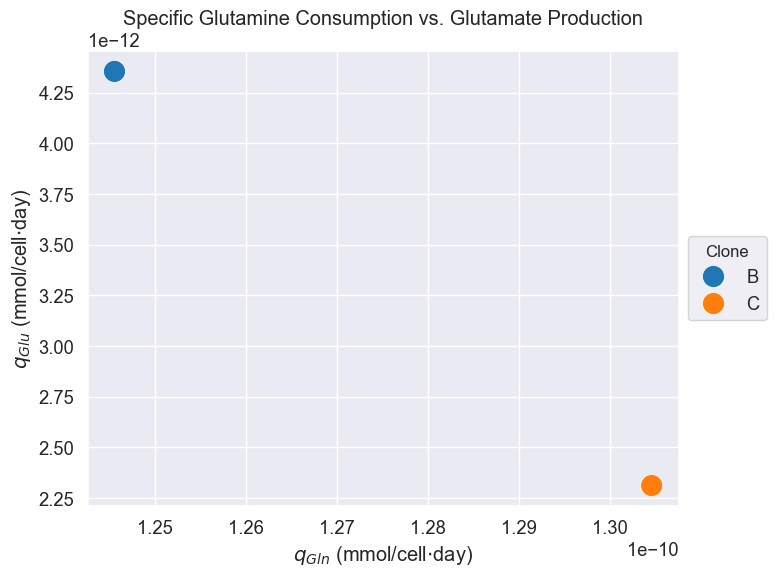

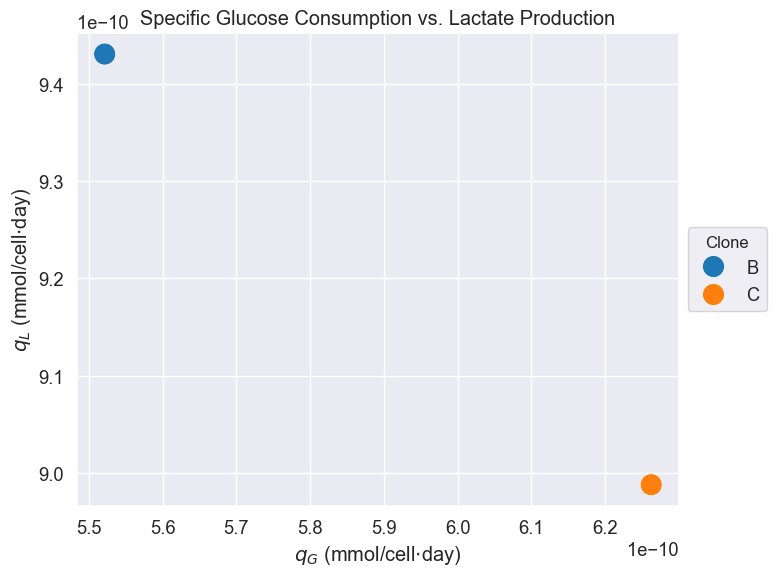


✅ All parameter comparison plots have been generated and saved to the 'figures' directory.

--- Generating Parameter Comparison Plots ---


C:\Users\ebald\AppData\Local\Temp\ipykernel_2588\1638763632.py:814: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


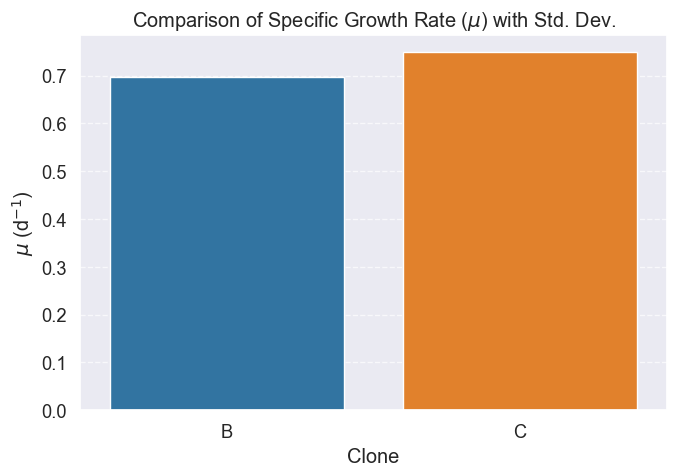

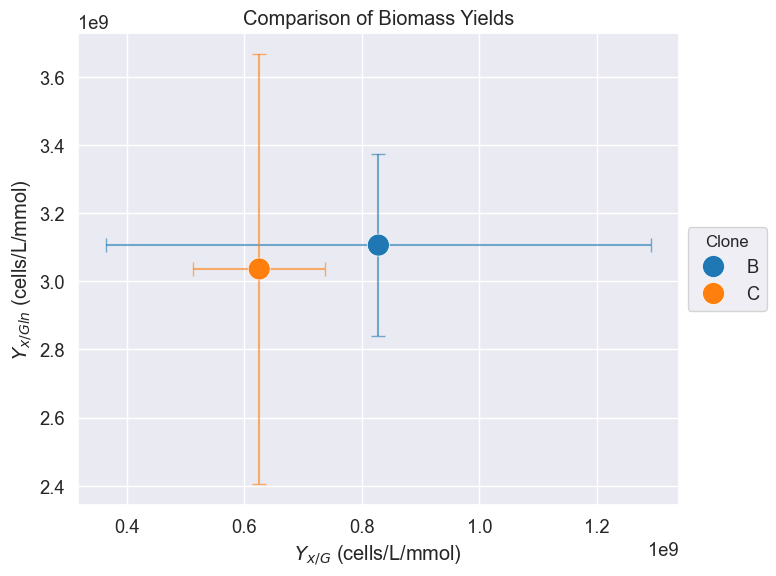

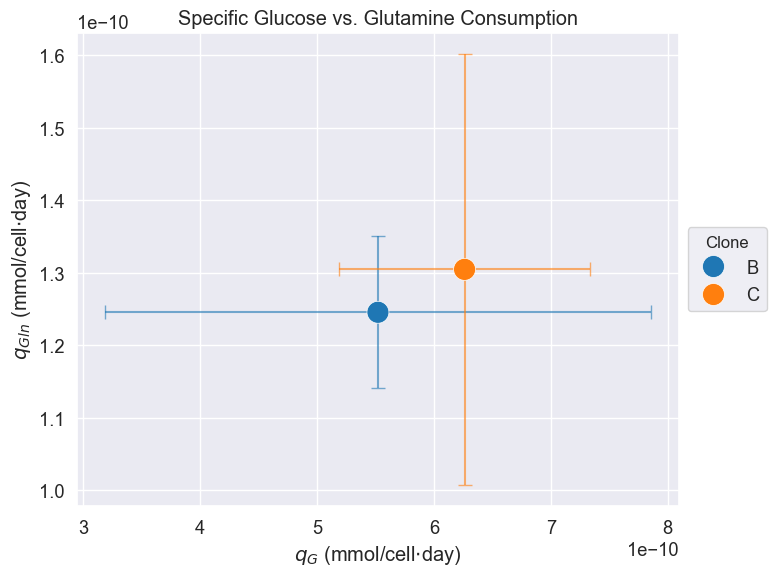

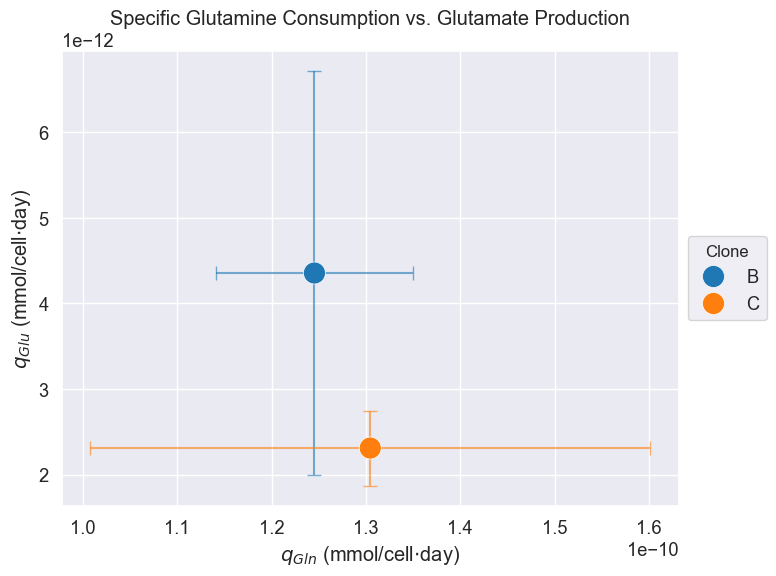

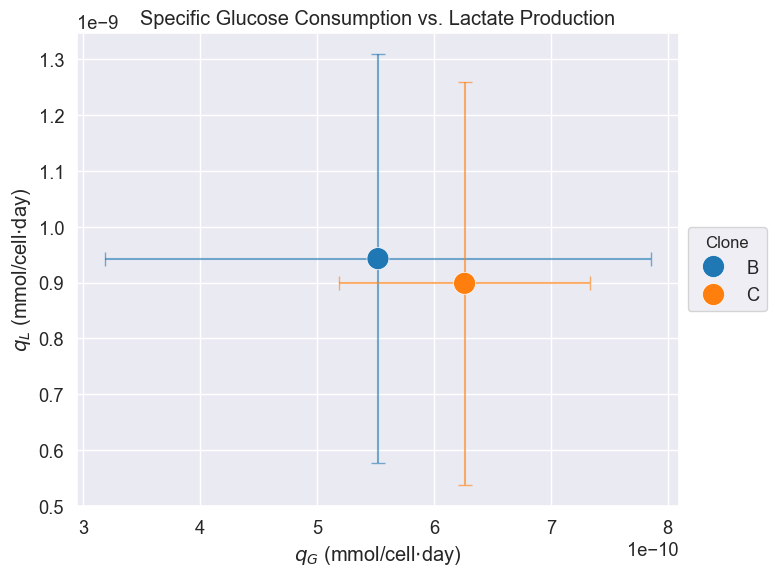


✅ All parameter comparison plots have been generated and saved to the 'figures' directory.


In [3]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from IPython.display import display # For displaying DataFrames in Jupyter/IPython environments
from typing import Union, Tuple # Necessary for type hints (e.g., pd.DataFrame | None) in Python versions < 3.10
from matplotlib.figure import Figure
from typing import List

'''
Section 1
'''
# --- Configuration and Helper Functions ---
# This section sets up global variables and defines reusable functions
# that facilitate data handling, plotting, and file operations.

# Define the path to your raw dataset.
# Ensure your CSV file is located in a 'data/' directory relative to your script.
DATASET_PATH = 'data/2024-05-18_Clones_B_C_Kinetics.csv'

# Configure the output directory for generated figures.
# The directory will be created automatically if it doesn't already exist.
OUTPUT_DIR = 'figures'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Set a consistent aesthetic theme for all plots using Seaborn.
# 'darkgrid' provides a clean background, and 'font_scale' adjusts text size for readability.
sns.set_theme(style="darkgrid", font_scale=1.2)

def clean_filename(name: str) -> str:
    """
    Cleans a string to make it suitable for use as a filename.
    It replaces or removes characters that are typically invalid or problematic
    in file paths, ensuring cross-platform compatibility.

    Args:
        name (str): The original string to be cleaned.

    Returns:
        str: The cleaned string, safe to use as a filename.
    """
    # Replace spaces, parentheses, slashes, percentage signs, colons, and dots
    # with underscores or remove them to create a valid filename.
    # The order of replacements is important to avoid unintended transformations.
    cleaned = name.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    cleaned = cleaned.replace('%', '').replace(':', '_').replace('.', '_')
    return cleaned

def confirm_columns(df: pd.DataFrame, expected_columns: list[str]) -> None:
    """
    Checks for the presence of a predefined list of expected columns within a DataFrame.
    It prints a clear report indicating which columns were found and which are missing,
    providing immediate feedback on data integrity.

    Args:
        df (pd.DataFrame): The DataFrame to inspect for column presence.
        expected_columns (list[str]): A list of column names that are anticipated in the DataFrame.
    """
    found_columns = [col for col in expected_columns if col in df.columns]
    missing_columns = [col for col in expected_columns if col not in df.columns]

    print("\n🔍 **Column Check Report** 🔍")
    print(f"\n✔️ Found Columns ({len(found_columns)}):")
    for col in found_columns:
        print(f"   - {col}")

    if missing_columns:
        print(f"\n❌ Missing Columns ({len(missing_columns)}):")
        for col in missing_columns:
            print(f"   - {col}")
        print("\n⚠️ WARNING: Some expected columns are missing. Analysis may be impacted.")
    else:
        print("\n🎉 All expected columns are present!")

def calculate_kinetics_stats(df: pd.DataFrame, value_column: str) -> Union[pd.DataFrame, None]:
    """
    Calculates the mean and standard deviation for a specified value column,
    grouped by 'Time (days)' and 'Clone'. This function is fundamental for
    generating time-series plots that include error bars representing data variability
    across experimental replicates.

    Args:
        df (pd.DataFrame): The input DataFrame containing raw kinetic data.
        value_column (str): The name of the column for which to compute mean and standard deviation.

    Returns:
        Union[pd.DataFrame, None]: A new DataFrame containing 'Time (days)', 'Clone', 'mean',
                                   and 'std' columns for the specified `value_column`.
                                   Returns `None` if the `value_column` is not found in the input DataFrame.
    """
    if value_column not in df.columns:
        print(f"Warning: Column '{value_column}' not found in DataFrame. Skipping statistics calculation.")
        return None

    # Group by 'Time (days)' and 'Clone' to calculate statistics for each unique condition.
    # `observed=False` is used to include all categories of 'Clone' even if they don't have
    # data in a specific group, suppressing a `FutureWarning` from pandas.
    kinetics_stats = df.groupby(['Time (days)', 'Clone'], observed=False)[value_column].agg(
        mean='mean', # Calculate the mean of the value_column for each group
        std='std'    # Calculate the standard deviation of the value_column for each group
    ).reset_index() # Resetting the index turns the grouped columns back into regular columns

    return kinetics_stats



'''
Section 2
'''
# --- Data Loading and Cleaning ---
# This section handles reading the raw data, standardizing column names,
# and converting data types to ensure numerical columns are correctly processed.
# It also includes robust error handling for non-numeric entries.

def load_and_clean_data(file_path: str, expected_columns: list[str]) -> pd.DataFrame:
    """
    Loads a CSV dataset, performs initial cleaning, standardizes column names,
    and converts data types to prepare the DataFrame for analysis.
    This function is designed to handle CHO cell culture kinetic data, ensuring
    numerical columns are properly formatted and 'Clone' is treated as a category.

    Args:
        file_path (str): The full path to the CSV file to be loaded.
        expected_columns (list[str]): A list of anticipated column names in the
                                      raw dataset. Used for initial validation.

    Returns:
        pd.DataFrame: A cleaned and prepared DataFrame, ready for further analysis.
                      The function will exit the script if the file is not found
                      or if other loading errors occur.
    """
    try:
        # Read the CSV file, skipping the first row if it's a header or metadata line.
        df = pd.read_csv(file_path, skiprows=1)
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found. Please verify the path and file name.")
        exit() # Exit the script if the file isn't found
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
        exit() # Exit for other general loading errors

    # Strip any leading/trailing whitespace from column names to ensure consistency.
    df.columns = df.columns.str.strip()
    # Confirm that all expected columns are present after loading.
    confirm_columns(df, expected_columns)

    # Standardize column names for clarity and ease of access throughout the script.
    # This maps short, raw column names to more descriptive, readable ones.
    df.rename(columns={
        "T": "Time (days)",
        "G": "Glucose (g/L)",
        "Gln": "Glutamine (mmol/L)",
        "Xv": "Viable Cells (cells/mL)",
        "Xd": "Dead Cells (cells/mL)",
        "L": "Lactate (g/L)",
        "Glu": "Glutamate (mmol/L)",
        "V": "Viability (%)",
        "MAb": "Antibody Concentration (mg/mL)",
        "rP": "Recombinant Protein (mg/mL)",
        "rep": "Replicate"
    }, inplace=True)

    # Clean and convert numerical columns. This robust approach handles cases
    # where columns might contain non-numeric strings (e.g., symbols, commas).
    for column in df.columns:
        # Skip columns that are not expected to be numerical or are already processed.
        if column in ["Clone", "Time (days)", "Replicate"]:
            continue

        # Attempt to convert to numeric, coercing errors to NaN.
        # This first converts to string to apply regex, then to numeric.
        df[column] = pd.to_numeric(
            df[column].astype(str).str.replace(r'[^\d.]', '', regex=True), # Remove non-digit/non-dot chars
            errors='coerce' # Convert parsing errors into NaN (Not a Number)
        )

    # Convert the 'Clone' column to a categorical type. This is efficient for grouping
    # and plotting, and it ensures consistent ordering and color mapping.
    if "Clone" in df.columns: # Check if 'Clone' column exists before converting
        df["Clone"] = df["Clone"].astype("category")

    return df

# Define the expected raw column names from your dataset for validation.
# This list is used by the `confirm_columns` function to check data integrity.
expected_raw_columns = [
    "Clone", "T", "G", "Gln", "Xv", "Xd", "L", "V", "MAb", "rP", "rep"
]

# Load and clean the dataset by calling the defined function.
kinetics_data = load_and_clean_data(DATASET_PATH, expected_raw_columns)

# Display a preview of the first few rows of the cleaned data.
print("\n**Cleaned Data Head:**")
display(kinetics_data.head())

# Display a statistical summary of the numerical columns in the cleaned DataFrame.
print("\n🔍 **DataFrame Overview** 🔍")
display(kinetics_data.describe())

# Print concise summary of the DataFrame including data types and non-null values.
print("\nDataFrame Info:")
kinetics_data.info()



'''
Section 3
'''
# --- Individual Kinetic Plots (Mean ± Standard Deviation) ---
# This section generates time-series plots for individual kinetic parameters,
# showing the mean and standard deviation across replicates for each clone.

def save_plot_with_stats(df_stats: pd.DataFrame, x_col: str, y_original_col_name: str,
                         output_dir: str, **kwargs) -> None:
    """
    Generates and saves a time-series plot for a given 'y' variable, displaying its
    mean and standard deviation across different clones. The input DataFrame `df_stats`
    is expected to already contain 'mean' and 'std' columns for the 'y' variable.

    Args:
        df_stats (pd.DataFrame): A DataFrame containing pre-calculated mean and
                                 standard deviation for the kinetic data.
        x_col (str): The name of the column to be used for the x-axis (e.g., 'Time (days)').
        y_original_col_name (str): The original name of the column for which statistics
                                   were calculated (used for labels and titles).
        output_dir (str): The directory path where the generated plot image will be saved.
        **kwargs: Arbitrary keyword arguments to customize the plot, including:
            - figsize (tuple): Dimensions of the figure (width, height) in inches. Defaults to (10, 6).
            - xlabel (str): Custom label for the x-axis. Defaults to `x_col`.
            - ylabel (str): Custom label for the y-axis. Defaults to `y_original_col_name`.
            - title (str): Custom title for the plot. Defaults to a descriptive title.
            - ylim (tuple): A tuple (min, max) to set the y-axis limits. Defaults to None.
    """
    if df_stats is None or df_stats.empty:
        print(f"No data to plot for '{y_original_col_name}'. Skipping plot generation.")
        return

    # Set the figure size; uses a default if not provided in kwargs.
    fig_size = kwargs.get('figsize', (10, 6))
    plt.figure(figsize=fig_size)

    # Use seaborn.lineplot to draw the mean lines, differentiating by 'Clone'.
    # `errorbar=None` is used here because error bars will be added manually for more control.
    sns.lineplot(x=x_col, y='mean', hue="Clone", style="Clone", markers=True,
                 data=df_stats, errorbar=None, ax=plt.gca())

    # Get the current color palette and clone categories for consistent error bar coloring.
    color_palette = sns.color_palette()
    clone_categories = df_stats['Clone'].cat.categories

    # Manually add error bars for each clone based on the 'std' column.
    for i, clone_name in enumerate(clone_categories):
        clone_data = df_stats[df_stats['Clone'] == clone_name]
        plt.errorbar(
            clone_data[x_col],
            clone_data['mean'],
            yerr=clone_data['std'],
            fmt='none',       # No line connecting error points
            capsize=5,        # Size of the error bar caps
            color=color_palette[i % len(color_palette)], # Assign a unique color per clone
            alpha=0.6         # Transparency for error bars
        )

    # Set plot labels and title, using custom values from kwargs if provided.
    plt.xlabel(kwargs.get('xlabel', x_col))
    plt.ylabel(kwargs.get('ylabel', y_original_col_name))
    plt.title(kwargs.get('title', f"{y_original_col_name} vs {x_col} (Mean ± Std Dev)"))
    plt.ylim(kwargs.get('ylim', None)) # Apply Y-axis limits if specified
    plt.grid(True) # Display grid for better readability

    # Place the legend, ensuring it doesn't overlap excessively with the plot.
    # `plt.tight_layout()` will automatically adjust space for it.
    plt.legend(title="Clone")
    plt.tight_layout() # Adjust layout to prevent labels/legends from overlapping

    # Clean the filename for saving and construct the full output path.
    base_filename = f"{y_original_col_name}_vs_{x_col}_Mean_StdDev"
    cleaned_base = clean_filename(base_filename)
    final_filename_with_ext = f"{cleaned_base}.png"
    output_path = os.path.join(output_dir, final_filename_with_ext)
    # Save the figure. `bbox_inches='tight'` ensures minimal whitespace around the plot.
    plt.savefig(output_path, format="png", dpi=300, bbox_inches='tight')
    plt.show() # Display the plot

print("\n--- Generating Individual Kinetic Plots ---")

# Define configurations for each individual plot.
# Each dictionary specifies the column to plot, its title, Y-axis label,
# and optional Y-axis limits for better visualization.
plot_configs_individual = [
    {"col": "Viable Cells (cells/mL)", "title": "Time vs Viable Cell Density (VCD)", "ylabel": "Viable Cells (cells/mL)", "ylim": (0, 25e6)},
    {"col": "Viability (%)", "title": "Time vs Viability", "ylabel": "Viability (%)", "ylim": (0, 110)},
    {"col": "Glucose (g/L)", "title": "Time vs Glucose Consumption", "ylabel": "Glucose (g/L)", "ylim": (0, 10)},
    {"col": "Lactate (g/L)", "title": "Time vs Lactate Production", "ylabel": "Lactate (g/L)", "ylim": (0, 6)},
    {"col": "Glutamine (mmol/L)", "title": "Time vs Glutamine Consumption", "ylabel": "Glutamine (mmol/L)", "ylim": (0, 8)},
    {"col": "Glutamate (mmol/L)", "title": "Time vs Glutamate Production", "ylabel": "Glutamate (mmol/L)", "ylim": (0, 6)},
    {"col": "Antibody Concentration (mg/mL)", "title": "Time vs Antibody Concentration", "ylabel": "Antibody Concentration (mg/mL)", "ylim": (0, 1.25)},
]

# Loop through each plot configuration to generate and save individual plots.
for config in plot_configs_individual:
    column_name = config["col"]
    # Calculate mean and std dev for the current column across clones and time points.
    stats_df = calculate_kinetics_stats(kinetics_data, column_name)
    # Generate and save the plot using the helper function.
    save_plot_with_stats(stats_df, "Time (days)", column_name, OUTPUT_DIR,
                         ylabel=config["ylabel"], title=config["title"], ylim=config["ylim"])

print(f"\n✅ All individual plots have been generated and saved to the '{OUTPUT_DIR}' directory.")


'''
Section 4
'''
# --- Combined Kinetic Plots (Dual Y-Axis with Mean ± Standard Deviation) ---
# This section generates plots combining two different kinetic parameters on a single graph,
# each with its own Y-axis, showing mean and standard deviation across replicates.

def save_combined_plot_with_stats(df: pd.DataFrame, x_col: str, y1_col: str, y2_col: str,
                                  output_dir: str, y1_label: str, y2_label: str, title: str,
                                  y1_ylim: tuple[float, float] | None = None,
                                  y2_ylim: tuple[float, float] | None = None,
                                  figsize: tuple[float, float] = (10.5, 6)) -> None:
    """
    Generates and saves a combined plot with two Y-axes, allowing comparison of two
    different kinetic variables against a common X-axis (Time). The plot displays
    the mean and standard deviation for both variables.

    Args:
        df (pd.DataFrame): The input DataFrame containing the raw kinetic data.
        x_col (str): The name of the column for the x-axis (e.g., 'Time (days)').
        y1_col (str): The name of the column for the primary y-axis (left).
        y2_col (str): The name of the column for the secondary y-axis (right).
        output_dir (str): The directory path where the generated plot image will be saved.
        y1_label (str): The label for the primary y-axis.
        y2_label (str): The label for the secondary y-axis.
        title (str): The main title for the plot.
        y1_ylim (tuple | None): A tuple (min, max) to set the primary y-axis limits. Defaults to None.
        y2_ylim (tuple | None): A tuple (min, max) to set the secondary y-axis limits. Defaults to None.
        figsize (tuple): Dimensions of the figure (width, height) in inches. Defaults to (10.5, 6).
    """
    # Calculate mean and standard deviation for both primary and secondary Y-axis variables.
    stats_y1 = calculate_kinetics_stats(df, y1_col)
    stats_y2 = calculate_kinetics_stats(df, y2_col)

    # If data is missing for either variable, skip plot generation and print a warning.
    if stats_y1 is None or stats_y2 is None:
        print(f"Skipping combined plot for {y1_col} and {y2_col} due to missing data.")
        return

    # Create a figure and a primary axes object (ax1).
    # `ax2 = ax1.twinx()` creates a secondary axes that shares the same x-axis.
    fig, ax1 = plt.subplots(figsize=figsize)
    ax2 = ax1.twinx()

    # Get a color palette and map colors consistently to each clone category.
    color_palette = sns.color_palette()
    clone_categories = df['Clone'].cat.categories
    clone_colors = {clone: color_palette[i % len(color_palette)] for i, clone in enumerate(clone_categories)}

    lines = [] # List to store line objects for the legend

    # Plot for the first variable (y1_col) on the primary Y-axis (ax1).
    for i, clone_name in enumerate(clone_categories):
        clone_data_y1 = stats_y1[stats_y1['Clone'] == clone_name]
        line, = ax1.plot(clone_data_y1[x_col], clone_data_y1['mean'],
                         label=f'{clone_name} - {y1_col}',
                         color=clone_colors[clone_name],
                         linestyle='-', marker='o') # Solid line, circle markers
        lines.append(line)
        # Add error bars for the primary variable.
        ax1.errorbar(clone_data_y1[x_col], clone_data_y1['mean'],
                     yerr=clone_data_y1['std'], fmt='none', capsize=5,
                     color=clone_colors[clone_name], alpha=0.6)

    # Plot for the second variable (y2_col) on the secondary Y-axis (ax2).
    for i, clone_name in enumerate(clone_categories):
        clone_data_y2 = stats_y2[stats_y2['Clone'] == clone_name]
        line, = ax2.plot(clone_data_y2[x_col], clone_data_y2['mean'],
                         label=f'{clone_name} - {y2_col}',
                         color=clone_colors[clone_name],
                         linestyle='--', marker='x') # Dashed line, 'x' markers
        lines.append(line)
        # Add error bars for the secondary variable.
        ax2.errorbar(clone_data_y2[x_col], clone_data_y2['mean'],
                     yerr=clone_data_y2['std'], fmt='none', capsize=5,
                     color=clone_colors[clone_name], alpha=0.6)

    # Set X-axis label and Y-axis labels with specific colors to distinguish them.
    ax1.set_xlabel(x_col)
    ax1.set_ylabel(y1_label, color=color_palette[0])
    ax2.set_ylabel(y2_label, color=color_palette[1])

    # Apply tick parameter colors for the Y-axes to match their respective labels.
    ax1.tick_params(axis='y', labelcolor=color_palette[0])
    ax2.tick_params(axis='y', labelcolor=color_palette[1])

    # Set Y-axis limits if provided for better visualization.
    if y1_ylim:
        ax1.set_ylim(y1_ylim)
    if y2_ylim:
        ax2.set_ylim(y2_ylim)

    plt.title(title) # Set the main plot title
    ax1.grid(True) # Display grid on the primary axis

    # Generate a single legend that includes entries from both Y-axes.
    # `loc='best'` attempts to find the optimal legend location.
    labs = [l.get_label() for l in lines]
    ax1.legend(lines, labs, loc='upper left', title="Variable & Clone")

    plt.tight_layout() # Adjust layout to prevent elements from overlapping

    # Clean the filename for saving and construct the full output path.
    # The title is cleaned by removing " vs " and the mean/std dev suffix for a concise filename.
    # --- MODIFICACIÓN INICIA AQUÍ ---
    base_filename = title.replace(" vs ", "_vs_").replace(" (Mean ± Std Dev)", "")
    cleaned_base_filename = clean_filename(base_filename)
    final_filename_with_extension = cleaned_base_filename + ".png"
    output_path = os.path.join(output_dir, final_filename_with_extension)
    # --- MODIFICACIÓN TERMINA AQUÍ ---

    # Save the figure. `bbox_inches='tight'` ensures minimal whitespace around the plot content.
    plt.savefig(output_path, format="png", dpi=300, bbox_inches='tight')
    plt.show() # Display the plot

print("\n--- Generating Combined (Dual Y-Axis) Plots ---")

# Convert Glucose from g/L to mmol/L if not already done.
# This conversion is necessary for consistent unit comparison with Glutamine.
# Glucose MW approx. 180.16 g/mol
if "Glucose (g/L)" in kinetics_data.columns and "Glucose (mmol/L)" not in kinetics_data.columns:
    kinetics_data["Glucose (mmol/L)"] = kinetics_data["Glucose (g/L)"] * 1000 / 180.16

# Define configurations for each combined plot.
# Each dictionary specifies the two columns to plot, their respective labels,
# the plot title, and optional Y-axis limits for both axes.
combined_plot_configs = [
    {
        "y1_col": "Glucose (g/L)",
        "y2_col": "Lactate (g/L)",
        "y1_label": "Glucose (g/L)",
        "y2_label": "Lactate (g/L)",
        "title": "Glucose and Lactate vs Time (Mean ± Std Dev)",
        "y1_ylim": (0, 10),
        "y2_ylim": (0, 6)
    },
    {
        "y1_col": "Glutamine (mmol/L)",
        "y2_col": "Glutamate (mmol/L)",
        "y1_label": "Glutamine (mmol/L)",
        "y2_label": "Glutamate (mmol/L)",
        "title": "Glutamine and Glutamate vs Time (Mean ± Std Dev)",
        "y1_ylim": (0, 8),
        "y2_ylim": (0, 6)
    },
    {
        "y1_col": "Glucose (mmol/L)", # Using converted Glucose for consistent units
        "y2_col": "Glutamine (mmol/L)",
        "y1_label": "Glucose (mmol/L)",
        "y2_label": "Glutamine (mmol/L)",
        "title": "Glucose and Glutamine vs Time (Mean ± Std Dev)",
        "y1_ylim": (0, 50),
        "y2_ylim": (0, 8)
    }
]

# Loop through each combined plot configuration to generate and save plots.
for config in combined_plot_configs:
    save_combined_plot_with_stats(
        kinetics_data,
        "Time (days)",
        config["y1_col"],
        config["y2_col"],
        OUTPUT_DIR,
        config["y1_label"],
        config["y2_label"],
        config["title"],
        y1_ylim=config["y1_ylim"],
        y2_ylim=config["y2_ylim"]
    )


save_combined_plot_with_stats(
    df=kinetics_data,
    x_col='Time (days)',
    y1_col='Viable Cells (cells/mL)',
    y2_col='Antibody Concentration (mg/mL)',
    output_dir=OUTPUT_DIR,
    y1_label=r"Viable Cells (cells/mL)",
    y2_label=r"Antibody Concentration (mg/mL)",
    title="Viable Cell Kinetics and Antibody Concentration (Mean ± Standard Deviation)",
    figsize=(10.5, 6) # Usando el tamaño por defecto de tu función
)


print(f"\n✅ All combined plots have been generated and saved to the '{OUTPUT_DIR}' directory.")

'''
Section 5
'''
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from IPython.display import display
from typing import Union, Tuple

# --- Configuration and Helper Functions (Ensure these are correctly defined from earlier sections) ---
# ... (your existing code for clean_filename, confirm_columns, calculate_kinetics_stats) ...
# Assuming dataset_path, output_dir, sns.set_theme are defined globally as in Section 1

# --- Data Loading and Cleaning (Ensure this is correctly defined from earlier sections) ---
# ... (your existing code for load_and_clean_data, expected_raw_columns, kinetics_data) ...

# --- Calculation of Kinetic and Stoichiometric Parameters ---
# This section calculates key kinetic and stoichiometric parameters for each clone,
# characterizing cell growth, substrate consumption, and product formation rates
# during the exponential growth phase. It now also calculates the standard deviation
# for these parameters across replicates.

# Define the time range for the exponential phase.
# These values are crucial for selecting the data subset used in kinetic calculations.
TIME_START = 0  # Start time in days for exponential phase analysis
TIME_END = 5    # End time in days for exponential phase analysis

# Define standard molecular weights (MW) for relevant metabolites.
# These are used for unit conversions (e.g., g/L to mmol/L).
MW_GLUCOSE = 180.16  # g/mol
MW_LACTATE = 90.08   # g/mol
MW_GLUTAMINE = 146.14 # g/mol
MW_GLUTAMATE = 147.13 # g/mol

print(f"\n--- Análisis de Fase Exponencial: Usando datos de {TIME_START} a {TIME_END} días ---")

# List of clones
clones = kinetics_data["Clone"].unique()

# List to store results for each replicate, for each clone
# We will calculate parameters for each replicate first, then aggregate.
all_replicate_params = []

# Loop through each clone
for clone in clones:
    # Filter the original kinetics_data for the current clone
    df_clone = kinetics_data[kinetics_data["Clone"] == clone]

    # Get unique replicates for this clone
    replicates = df_clone["Replicate"].unique()

    # Loop through each replicate within the clone
    for rep in replicates:
        df_replicate = df_clone[df_clone["Replicate"] == rep].copy() # Use .copy() to avoid SettingWithCopyWarning

        # Ensure and/or perform unit conversions for this specific replicate
        # Check if column exists before trying to convert
        if "Glucose (mmol/L)" not in df_replicate.columns and "Glucose (g/L)" in df_replicate.columns:
            df_replicate["Glucose (mmol/L)"] = df_replicate["Glucose (g/L)"] * 1000 / MW_GLUCOSE
        if "Lactate (mmol/L)" not in df_replicate.columns and "Lactate (g/L)" in df_replicate.columns:
            df_replicate["Lactate (mmol/L)"] = df_replicate["Lactate (g/L)"] * 1000 / MW_LACTATE
        # Convert Viable Cells from cells/mL to cells/L
        if "Viable Cells (cells/L)" not in df_replicate.columns and "Viable Cells (cells/mL)" in df_replicate.columns:
            df_replicate["Viable Cells (cells/L)"] = df_replicate["Viable Cells (cells/mL)"] * 1e3

        # Calculate ln(Viable Cells), handling zero or negative values
        df_replicate.loc[df_replicate["Viable Cells (cells/L)"] > 0, "ln(Viable Cells)"] = \
            np.log(df_replicate["Viable Cells (cells/L)"][df_replicate["Viable Cells (cells/L)"] > 0])

        # Filter data for the exponential phase and drop NaNs in ln(Viable Cells)
        df_subset_rep = df_replicate[(df_replicate["Time (days)"] >= TIME_START) & \
                                     (df_replicate["Time (days)"] <= TIME_END)].dropna(subset=["ln(Viable Cells)"])

        if len(df_subset_rep) < 2:
            print(f"  > Insufficient data for clone '{clone}', replicate '{rep}' in the range {TIME_START}-{TIME_END} days for regression. Skipping replicate...")
            continue

        # --- Kinetic and Stoichiometric Calculations for the Current Replicate ---
        param_values = {"Clone": clone, "Replicate": rep}

        # 1. Specific Growth Rate (mu, μ)
        slope_mu, _, _, _, _ = linregress(
            df_subset_rep["Time (days)"], df_subset_rep["ln(Viable Cells)"]
        )
        param_values["Specific Growth Rate (mu, d^-1)"] = slope_mu

        # Deltas of metabolites and cells
        # Use .iloc to get start and end values from the filtered subset
        delta_G = df_subset_rep["Glucose (mmol/L)"].iloc[-1] - df_subset_rep["Glucose (mmol/L)"].iloc[0] if "Glucose (mmol/L)" in df_subset_rep.columns else np.nan
        delta_Gln = df_subset_rep["Glutamine (mmol/L)"].iloc[-1] - df_subset_rep["Glutamine (mmol/L)"].iloc[0] if "Glutamine (mmol/L)" in df_subset_rep.columns else np.nan
        delta_Glu = df_subset_rep["Glutamate (mmol/L)"].iloc[-1] - df_subset_rep["Glutamate (mmol/L)"].iloc[0] if "Glutamate (mmol/L)" in df_subset_rep.columns else np.nan
        delta_L = df_subset_rep["Lactate (mmol/L)"].iloc[-1] - df_subset_rep["Lactate (mmol/L)"].iloc[0] if "Lactate (mmol/L)" in df_subset_rep.columns else np.nan
        delta_X = df_subset_rep["Viable Cells (cells/L)"].iloc[-1] - df_subset_rep["Viable Cells (cells/L)"].iloc[0] if "Viable Cells (cells/L)" in df_subset_rep.columns else np.nan

        delta_t = df_subset_rep["Time (days)"].iloc[-1] - df_subset_rep["Time (days)"].iloc[0]
        X_avg = (df_subset_rep["Viable Cells (cells/L)"].iloc[0] + df_subset_rep["Viable Cells (cells/L)"].iloc[-1]) / 2

        # 2. Biomass Yield Coefficients (Yx/S)
        param_values["Biomass Yield (Yx/G, cells/L/mmol)"] = delta_X / abs(delta_G) if delta_G != 0 and not np.isnan(delta_G) else np.nan
        param_values["Biomass Yield (Yx/Gln, cells/L/mmol)"] = delta_X / abs(delta_Gln) if delta_Gln != 0 and not np.isnan(delta_Gln) else np.nan

        # 3. Average Volumetric Rates (dC/dt)
        avg_delta_G_dt = delta_G / delta_t if delta_t != 0 else np.nan
        avg_delta_Gln_dt = delta_Gln / delta_t if delta_t != 0 else np.nan
        avg_delta_Glu_dt = delta_Glu / delta_t if delta_t != 0 else np.nan
        avg_delta_L_dt = delta_L / delta_t if delta_t != 0 else np.nan

        param_values["Average Glucose Rate (dG/dt, mmol/L/day)"] = avg_delta_G_dt
        param_values["Average Glutamine Rate (dGln/dt, mmol/L/day)"] = avg_delta_Gln_dt
        param_values["Average Glutamate Rate (dGlu/dt, mmol/L/day)"] = avg_delta_Glu_dt
        param_values["Average Lactate Rate (dL/dt, mmol/L/day)"] = avg_delta_L_dt

        # 4. Specific Metabolic Rates (qS, qP)
        param_values["Specific Glucose Consumption (qG, mmol/cell·day)"] = abs(avg_delta_G_dt / X_avg) if not np.isnan(avg_delta_G_dt) and X_avg != 0 else np.nan
        param_values["Specific Glutamine Consumption (qGln, mmol/cell·day)"] = abs(avg_delta_Gln_dt / X_avg) if not np.isnan(avg_delta_Gln_dt) and X_avg != 0 else np.nan
        param_values["Specific Glutamate Production (qGlu, mmol/cell·day)"] = abs(avg_delta_Glu_dt / X_avg) if not np.isnan(avg_delta_Glu_dt) and X_avg != 0 else np.nan
        param_values["Specific Lactate Production (qL, mmol/cell·day)"] = abs(avg_delta_L_dt / X_avg) if not np.isnan(avg_delta_L_dt) and X_avg != 0 else np.nan

        all_replicate_params.append(param_values)

# Convert all replicate parameters into a DataFrame
df_replicate_params = pd.DataFrame(all_replicate_params)

# --- NEW DISPLAY ADDED HERE ---
print("\n**Parámetros Cinéticos y Estequiométricos Calculados por Cada Réplica:**")
display(df_replicate_params)
# --- END OF NEW DISPLAY ---

# Now, group by 'Clone' and calculate the mean and standard deviation for each parameter.
# Identify columns that are not 'Clone' or 'Replicate' to aggregate.
param_cols = [col for col in df_replicate_params.columns if col not in ["Clone", "Replicate"]]

df_results_mean = df_replicate_params.groupby("Clone")[param_cols].mean().reset_index()
df_results_std = df_replicate_params.groupby("Clone")[param_cols].std().reset_index()

# Rename standard deviation columns for clarity (e.g., 'mu' -> 'mu_std')
df_results_std.columns = ['Clone'] + [f"{col}_std" for col in param_cols]

# Merge mean and std DataFrames
df_results = pd.merge(df_results_mean, df_results_std, on="Clone", how="left")

# Reorder columns for better readability (optional, but good for GitHub)
# First, collect all mean columns, then their corresponding std columns
ordered_columns = []
for p_col in param_cols:
    ordered_columns.append(p_col)
    if f"{p_col}_std" in df_results.columns: # Check if std column exists (it might not if only 1 replicate)
        ordered_columns.append(f"{p_col}_std")

df_results = df_results[["Clone"] + ordered_columns]

print("\n**Parámetros Cinéticos y Estequiométricos por Clona (Promedio ± Desviación Estándar):**")
display(df_results)

# Optional: Display info about the new df_results
print("\nInformación del DataFrame de Parámetros Cinéticos:")
df_results.info()



'''
Section 6
'''
# --- Comparison Plots for Kinetic and Stoichiometric Parameters ---
# This section generates comparative plots to visualize and analyze the calculated
# kinetic and stoichiometric parameters across different clones.

# Get unique clone names from the results DataFrame to ensure consistent color mapping.
clones_unique = df_results["Clone"].unique()

# Create a color palette using 'tab10' (or another suitable palette)
# and map each unique clone to a specific color for consistent visualization across plots.
clone_palette = sns.color_palette("tab10", n_colors=len(clones_unique))
clone_color_map = {clone: color for clone, color in zip(clones_unique, clone_palette)}

print("\n--- Generating Parameter Comparison Plots ---")

# --- Plot 1: Bar Chart for Specific Growth Rate (mu) ---
# This bar chart visually compares the specific growth rate (mu) for each clone.
plt.figure(figsize=(7, 5)) # Set a compact, square-ish figure size
sns.barplot(
    data=df_results,
    x="Clone",
    y="Specific Growth Rate (mu, d^-1)",
    palette=clone_color_map, # Apply consistent clone colors
    errorbar=None # No error bars are shown here as these are mean values from the previous calculation
)
plt.xlabel("Clone")
plt.ylabel(r"$\mu$ (d$^{-1}$)") # Use LaTeX for mu symbol and unit
plt.title(r"Comparison of Specific Growth Rate ($\mu$)") # Use LaTeX for mu in title
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a dashed grid on the y-axis
plt.tight_layout() # Adjust layout to prevent labels/titles from overlapping
# Save the figure with high DPI and tight bounding box to prevent cropping.
plt.savefig(os.path.join(OUTPUT_DIR, "specific_growth_rate_comparison.png"), format="png", dpi=300, bbox_inches='tight')
plt.show() # Display the plot

# --- Plot 2: Scatter Plot for Biomass Yield (Yx/G vs Yx/Gln) ---
# This scatter plot helps visualize the trade-off or correlation between
# biomass yield on glucose and biomass yield on glutamine.
plt.figure(figsize=(8, 6)) # Set figure size
sns.scatterplot(
    data=df_results,
    x="Biomass Yield (Yx/G, cells/L/mmol)",
    y="Biomass Yield (Yx/Gln, cells/L/mmol)",
    hue="Clone", # Differentiate points by clone
    palette=clone_color_map, # Apply consistent clone colors
    s=250, # Set marker size
    edgecolor="w", # White edge for markers for better visibility
    linewidth=0.5 # Line width for marker edges
)
plt.xlabel(r"$Y_{x/G}$ (cells/L/mmol)") # Use LaTeX for Yx/G
plt.ylabel(r"$Y_{x/Gln}$ (cells/L/mmol)") # Use LaTeX for Yx/Gln
plt.title("Comparison of Biomass Yields")
# Adjust legend position to avoid overlapping with the plot area.
plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "biomass_yield_comparison_scatter.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()

# --- Plot 3: Scatter Plot for Specific Glucose Consumption vs. Specific Glutamine Consumption ---
# This plot examines the relationship between glucose and glutamine uptake rates per cell.
plt.figure(figsize=(8, 6)) # Set figure size
sns.scatterplot(
    data=df_results,
    x="Specific Glucose Consumption (qG, mmol/cell·day)",
    y="Specific Glutamine Consumption (qGln, mmol/cell·day)",
    hue="Clone",
    palette=clone_color_map,
    s=250,
    edgecolor="w",
    linewidth=0.5
)
plt.xlabel(r"$q_G$ (mmol/cell$\cdot$day)") # Use LaTeX for qG and dot product
plt.ylabel(r"$q_{Gln}$ (mmol/cell$\cdot$day)") # Use LaTeX for qGln and dot product
plt.title("Specific Glucose vs. Glutamine Consumption")
plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "specific_consumption_comparison_scatter.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()

# --- Plot 4: Scatter Plot for Specific Glutamine Consumption vs. Specific Glutamate Production ---
# This plot highlights the connection between glutamine consumption and glutamate production,
# which can indicate metabolic pathways related to nitrogen metabolism.
plt.figure(figsize=(8, 6)) # Set figure size
sns.scatterplot(
    data=df_results,
    x="Specific Glutamine Consumption (qGln, mmol/cell·day)",
    y="Specific Glutamate Production (qGlu, mmol/cell·day)",
    hue="Clone",
    palette=clone_color_map,
    s=250,
    edgecolor="w",
    linewidth=0.5
)
plt.xlabel(r"$q_{Gln}$ (mmol/cell$\cdot$day)")
plt.ylabel(r"$q_{Glu}$ (mmol/cell$\cdot$day)")
plt.title("Specific Glutamine Consumption vs. Glutamate Production")
plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "specific_qGln_vs_qGlu_scatter.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()

# --- Plot 5: Scatter Plot for Specific Glucose Consumption vs. Specific Lactate Production ---
# This plot is critical for understanding the Warburg effect or glycolytic flux,
# showing the relationship between glucose uptake and lactate excretion.
plt.figure(figsize=(8, 6)) # Set figure size
sns.scatterplot(
    data=df_results,
    x="Specific Glucose Consumption (qG, mmol/cell·day)",
    y="Specific Lactate Production (qL, mmol/cell·day)",
    hue="Clone",
    palette=clone_color_map,
    s=250,
    edgecolor="w",
    linewidth=0.5
)
plt.xlabel(r"$q_G$ (mmol/cell$\cdot$day)")
plt.ylabel(r"$q_L$ (mmol/cell$\cdot$day)")
plt.title("Specific Glucose Consumption vs. Lactate Production")
plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "specific_qG_vs_qL_scatter.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ All parameter comparison plots have been generated and saved to the '{OUTPUT_DIR}' directory.")



'''
Extra: plots with error bars (std. deviation)
'''

# --- Comparison Plots for Kinetic and Stoichiometric Parameters ---
# This section generates comparative plots to visualize and analyze the calculated
# kinetic and stoichiometric parameters across different clones. It now includes
# error bars representing the standard deviation of these parameters.

# (Keep your existing clone_unique and clone_color_map setup as it is)
clones_unique = df_results["Clone"].unique()
clone_palette = sns.color_palette("tab10", n_colors=len(clones_unique))
clone_color_map = {clone: color for clone, color in zip(clones_unique, clone_palette)}

print("\n--- Generating Parameter Comparison Plots ---")

# --- Plot 1: Bar Chart for Specific Growth Rate (mu) ---
# This bar chart visually compares the specific growth rate (mu) for each clone,
# with error bars indicating the standard deviation across replicates.
plt.figure(figsize=(7, 5))
sns.barplot(
    data=df_results,
    x="Clone",
    y="Specific Growth Rate (mu, d^-1)",
    palette=clone_color_map,
    # Esta línea ya le indica a Seaborn que use la desviación estándar para las barras de error.
    errorbar='sd' 
)
plt.xlabel("Clone")
plt.ylabel(r"$\mu$ (d$^{-1}$)")
plt.title(r"Comparison of Specific Growth Rate ($\mu$) with Std. Dev.")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "specific_growth_rate_comparison.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()



# --- Plot 2: Scatter Plot for Biomass Yield (Yx/G vs Yx/Gln) ---
# This scatter plot helps visualize the trade-off or correlation between
# biomass yield on glucose and biomass yield on glutamine, with error bars.
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_results,
    x="Biomass Yield (Yx/G, cells/L/mmol)",
    y="Biomass Yield (Yx/Gln, cells/L/mmol)",
    hue="Clone",
    palette=clone_color_map,
    s=250,
    edgecolor="w",
    linewidth=0.5,
    zorder=2 # Ensure scatter points are on top of error bars if drawn manually
)

# Manually add error bars for scatter plot using plt.errorbar
# Get current axes
ax = plt.gca()

# Loop through each clone to add error bars
for clone in clones_unique:
    clone_data = df_results[df_results["Clone"] == clone]
    x_val = clone_data["Biomass Yield (Yx/G, cells/L/mmol)"].iloc[0]
    y_val = clone_data["Biomass Yield (Yx/Gln, cells/L/mmol)"].iloc[0]
    x_err = clone_data["Biomass Yield (Yx/G, cells/L/mmol)_std"].iloc[0] # Use _std column
    y_err = clone_data["Biomass Yield (Yx/Gln, cells/L/mmol)_std"].iloc[0] # Use _std column
    color = clone_color_map[clone]

    # Horizontal error bars
    ax.errorbar(x_val, y_val, xerr=x_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)
    # Vertical error bars
    ax.errorbar(x_val, y_val, yerr=y_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)


plt.xlabel(r"$Y_{x/G}$ (cells/L/mmol)")
plt.ylabel(r"$Y_{x/Gln}$ (cells/L/mmol)")
plt.title("Comparison of Biomass Yields")
plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "biomass_yield_comparison_scatter.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()

# --- Plot 3: Scatter Plot for Specific Glucose Consumption vs. Specific Glutamine Consumption ---
# This plot examines the relationship between glucose and glutamine uptake rates per cell, with error bars.
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_results,
    x="Specific Glucose Consumption (qG, mmol/cell·day)",
    y="Specific Glutamine Consumption (qGln, mmol/cell·day)",
    hue="Clone",
    palette=clone_color_map,
    s=250,
    edgecolor="w",
    linewidth=0.5,
    zorder=2
)

ax = plt.gca()
for clone in clones_unique:
    clone_data = df_results[df_results["Clone"] == clone]
    x_val = clone_data["Specific Glucose Consumption (qG, mmol/cell·day)"].iloc[0]
    y_val = clone_data["Specific Glutamine Consumption (qGln, mmol/cell·day)"].iloc[0]
    x_err = clone_data["Specific Glucose Consumption (qG, mmol/cell·day)_std"].iloc[0]
    y_err = clone_data["Specific Glutamine Consumption (qGln, mmol/cell·day)_std"].iloc[0]
    color = clone_color_map[clone]

    ax.errorbar(x_val, y_val, xerr=x_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)
    ax.errorbar(x_val, y_val, yerr=y_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)

plt.xlabel(r"$q_G$ (mmol/cell$\cdot$day)")
plt.ylabel(r"$q_{Gln}$ (mmol/cell$\cdot$day)")
plt.title("Specific Glucose vs. Glutamine Consumption")
plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "specific_consumption_comparison_scatter.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()

# --- Plot 4: Scatter Plot for Specific Glutamine Consumption vs. Specific Glutamate Production ---
# This plot highlights the connection between glutamine consumption and glutamate production,
# which can indicate metabolic pathways related to nitrogen metabolism, now with error bars.
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_results,
    x="Specific Glutamine Consumption (qGln, mmol/cell·day)",
    y="Specific Glutamate Production (qGlu, mmol/cell·day)",
    hue="Clone",
    palette=clone_color_map,
    s=250,
    edgecolor="w",
    linewidth=0.5,
    zorder=2
)

ax = plt.gca()
for clone in clones_unique:
    clone_data = df_results[df_results["Clone"] == clone]
    x_val = clone_data["Specific Glutamine Consumption (qGln, mmol/cell·day)"].iloc[0]
    y_val = clone_data["Specific Glutamate Production (qGlu, mmol/cell·day)"].iloc[0]
    x_err = clone_data["Specific Glutamine Consumption (qGln, mmol/cell·day)_std"].iloc[0]
    y_err = clone_data["Specific Glutamate Production (qGlu, mmol/cell·day)_std"].iloc[0]
    color = clone_color_map[clone]

    ax.errorbar(x_val, y_val, xerr=x_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)
    ax.errorbar(x_val, y_val, yerr=y_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)

plt.xlabel(r"$q_{Gln}$ (mmol/cell$\cdot$day)")
plt.ylabel(r"$q_{Glu}$ (mmol/cell$\cdot$day)")
plt.title("Specific Glutamine Consumption vs. Glutamate Production")
plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "specific_qGln_vs_qGlu_scatter.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()

# --- Plot 5: Scatter Plot for Specific Glucose Consumption vs. Specific Lactate Production ---
# This plot is critical for understanding the Warburg effect or glycolytic flux,
# showing the relationship between glucose uptake and lactate excretion, now with error bars.
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_results,
    x="Specific Glucose Consumption (qG, mmol/cell·day)",
    y="Specific Lactate Production (qL, mmol/cell·day)",
    hue="Clone",
    palette=clone_color_map,
    s=250,
    edgecolor="w",
    linewidth=0.5,
    zorder=2
)

ax = plt.gca()
for clone in clones_unique:
    clone_data = df_results[df_results["Clone"] == clone]
    x_val = clone_data["Specific Glucose Consumption (qG, mmol/cell·day)"].iloc[0]
    y_val = clone_data["Specific Lactate Production (qL, mmol/cell·day)"].iloc[0]
    x_err = clone_data["Specific Glucose Consumption (qG, mmol/cell·day)_std"].iloc[0]
    y_err = clone_data["Specific Lactate Production (qL, mmol/cell·day)_std"].iloc[0]
    color = clone_color_map[clone]

    ax.errorbar(x_val, y_val, xerr=x_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)
    ax.errorbar(x_val, y_val, yerr=y_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)


plt.xlabel(r"$q_G$ (mmol/cell$\cdot$day)")
plt.ylabel(r"$q_L$ (mmol/cell$\cdot$day)")
plt.title("Specific Glucose Consumption vs. Lactate Production")
plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "specific_qG_vs_qL_scatter.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ All parameter comparison plots have been generated and saved to the '{OUTPUT_DIR}' directory.")



In [ ]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from IPython.display import display # For displaying DataFrames in Jupyter/IPython environments
from typing import Union, Tuple # Necessary for type hints (e.g., pd.DataFrame | None) in Python versions < 3.10
from matplotlib.figure import Figure
from typing import List

'''
Section 1
'''
# --- Configuration and Helper Functions ---
# This section sets up global variables and defines reusable functions
# that facilitate data handling, plotting, and file operations.

# Define the path to your raw dataset.
# Ensure your CSV file is located in a 'data/' directory relative to your script.
DATASET_PATH = 'data/Datos_cinetica_18may2024.csv'

# Configure the output directory for generated figures.
# The directory will be created automatically if it doesn't already exist.
OUTPUT_DIR = 'figures'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Set a consistent aesthetic theme for all plots using Seaborn.
# 'darkgrid' provides a clean background, and 'font_scale' adjusts text size for readability.
sns.set_theme(style="darkgrid", font_scale=1.2)

def clean_filename(name: str) -> str:
    """
    Cleans a string to make it suitable for use as a filename.
    It replaces or removes characters that are typically invalid or problematic
    in file paths, ensuring cross-platform compatibility.

    Args:
        name (str): The original string to be cleaned.

    Returns:
        str: The cleaned string, safe to use as a filename.
    """
    # Replace spaces, parentheses, slashes, percentage signs, colons, and dots
    # with underscores or remove them to create a valid filename.
    # The order of replacements is important to avoid unintended transformations.
    cleaned = name.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    cleaned = cleaned.replace('%', '').replace(':', '_').replace('.', '_')
    return cleaned

def confirm_columns(df: pd.DataFrame, expected_columns: list[str]) -> None:
    """
    Checks for the presence of a predefined list of expected columns within a DataFrame.
    It prints a clear report indicating which columns were found and which are missing,
    providing immediate feedback on data integrity.

    Args:
        df (pd.DataFrame): The DataFrame to inspect for column presence.
        expected_columns (list[str]): A list of column names that are anticipated in the DataFrame.
    """
    found_columns = [col for col in expected_columns if col in df.columns]
    missing_columns = [col for col in expected_columns if col not in df.columns]

    print("\n🔍 **Column Check Report** 🔍")
    print(f"\n✔️ Found Columns ({len(found_columns)}):")
    for col in found_columns:
        print(f"   - {col}")

    if missing_columns:
        print(f"\n❌ Missing Columns ({len(missing_columns)}):")
        for col in missing_columns:
            print(f"   - {col}")
        print("\n⚠️ WARNING: Some expected columns are missing. Analysis may be impacted.")
    else:
        print("\n🎉 All expected columns are present!")

def calculate_kinetics_stats(df: pd.DataFrame, value_column: str) -> Union[pd.DataFrame, None]:
    """
    Calculates the mean and standard deviation for a specified value column,
    grouped by 'Time (days)' and 'Clone'. This function is fundamental for
    generating time-series plots that include error bars representing data variability
    across experimental replicates.

    Args:
        df (pd.DataFrame): The input DataFrame containing raw kinetic data.
        value_column (str): The name of the column for which to compute mean and standard deviation.

    Returns:
        Union[pd.DataFrame, None]: A new DataFrame containing 'Time (days)', 'Clone', 'mean',
                                   and 'std' columns for the specified `value_column`.
                                   Returns `None` if the `value_column` is not found in the input DataFrame.
    """
    if value_column not in df.columns:
        print(f"Warning: Column '{value_column}' not found in DataFrame. Skipping statistics calculation.")
        return None

    # Group by 'Time (days)' and 'Clone' to calculate statistics for each unique condition.
    # `observed=False` is used to include all categories of 'Clone' even if they don't have
    # data in a specific group, suppressing a `FutureWarning` from pandas.
    kinetics_stats = df.groupby(['Time (days)', 'Clone'], observed=False)[value_column].agg(
        mean='mean', # Calculate the mean of the value_column for each group
        std='std'    # Calculate the standard deviation of the value_column for each group
    ).reset_index() # Resetting the index turns the grouped columns back into regular columns

    return kinetics_stats



'''
Section 2
'''
# --- Data Loading and Cleaning ---
# This section handles reading the raw data, standardizing column names,
# and converting data types to ensure numerical columns are correctly processed.
# It also includes robust error handling for non-numeric entries.

def load_and_clean_data(file_path: str, expected_columns: list[str]) -> pd.DataFrame:
    """
    Loads a CSV dataset, performs initial cleaning, standardizes column names,
    and converts data types to prepare the DataFrame for analysis.
    This function is designed to handle CHO cell culture kinetic data, ensuring
    numerical columns are properly formatted and 'Clone' is treated as a category.

    Args:
        file_path (str): The full path to the CSV file to be loaded.
        expected_columns (list[str]): A list of anticipated column names in the
                                      raw dataset. Used for initial validation.

    Returns:
        pd.DataFrame: A cleaned and prepared DataFrame, ready for further analysis.
                      The function will exit the script if the file is not found
                      or if other loading errors occur.
    """
    try:
        # Read the CSV file, skipping the first row if it's a header or metadata line.
        df = pd.read_csv(file_path, skiprows=1)
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found. Please verify the path and file name.")
        exit() # Exit the script if the file isn't found
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
        exit() # Exit for other general loading errors

    # Strip any leading/trailing whitespace from column names to ensure consistency.
    df.columns = df.columns.str.strip()
    # Confirm that all expected columns are present after loading.
    confirm_columns(df, expected_columns)

    # Standardize column names for clarity and ease of access throughout the script.
    # This maps short, raw column names to more descriptive, readable ones.
    df.rename(columns={
        "T": "Time (days)",
        "G": "Glucose (g/L)",
        "Gln": "Glutamine (mmol/L)",
        "Xv": "Viable Cells (cells/mL)",
        "Xd": "Dead Cells (cells/mL)",
        "L": "Lactate (g/L)",
        "Glu": "Glutamate (mmol/L)",
        "V": "Viability (%)",
        "MAb": "Antibody Concentration (mg/mL)",
        "rP": "Recombinant Protein (mg/mL)",
        "rep": "Replicate"
    }, inplace=True)

    # Clean and convert numerical columns. This robust approach handles cases
    # where columns might contain non-numeric strings (e.g., symbols, commas).
    for column in df.columns:
        # Skip columns that are not expected to be numerical or are already processed.
        if column in ["Clone", "Time (days)", "Replicate"]:
            continue

        # Attempt to convert to numeric, coercing errors to NaN.
        # This first converts to string to apply regex, then to numeric.
        df[column] = pd.to_numeric(
            df[column].astype(str).str.replace(r'[^\d.]', '', regex=True), # Remove non-digit/non-dot chars
            errors='coerce' # Convert parsing errors into NaN (Not a Number)
        )

    # Convert the 'Clone' column to a categorical type. This is efficient for grouping
    # and plotting, and it ensures consistent ordering and color mapping.
    if "Clone" in df.columns: # Check if 'Clone' column exists before converting
        df["Clone"] = df["Clone"].astype("category")

    return df

# Define the expected raw column names from your dataset for validation.
# This list is used by the `confirm_columns` function to check data integrity.
expected_raw_columns = [
    "Clone", "T", "G", "Gln", "Xv", "Xd", "L", "V", "MAb", "rP", "rep"
]

# Load and clean the dataset by calling the defined function.
kinetics_data = load_and_clean_data(DATASET_PATH, expected_raw_columns)

# Display a preview of the first few rows of the cleaned data.
print("\n**Cleaned Data Head:**")
display(kinetics_data.head())

# Display a statistical summary of the numerical columns in the cleaned DataFrame.
print("\n🔍 **DataFrame Overview** 🔍")
display(kinetics_data.describe())

# Print concise summary of the DataFrame including data types and non-null values.
print("\nDataFrame Info:")
kinetics_data.info()


# =================================================================================
# == Section 2.5: Data Normalization for Visualization                         ==
# =================================================================================
# This block creates a new DataFrame with normalized data specifically for plotting.
# The original 'kinetics_data' DataFrame is kept unchanged for scientific calculations.
# =================================================================================

print("🔎 Creating a normalized copy of the DataFrame for visualization purposes...")

# 1. Create a copy of the original data to avoid modifying it.
kinetics_data_normalized = kinetics_data.copy()

# 2. Identify the columns to normalize (all numeric columns except for identifiers).
numerical_columns = kinetics_data_normalized.select_dtypes(include=np.number).columns.tolist()
columns_to_exclude = ['Time (days)', 'Replicate']
columns_to_normalize = [col for col in numerical_columns if col not in columns_to_exclude]

print("\nColumns to be normalized (scaled to a 0-1 range):")
for col in columns_to_normalize:
    print(f"  - {col}")

# 3. Apply Min-Max scaling to each column in the new DataFrame.
for col in columns_to_normalize:
    min_val = kinetics_data_normalized[col].min()
    max_val = kinetics_data_normalized[col].max()
    value_range = max_val - min_val

    if value_range > 0:
        kinetics_data_normalized[col] = (kinetics_data_normalized[col] - min_val) / value_range
    else:
        kinetics_data_normalized[col] = 0.0 # All values are the same, set to 0

print("\n✅ Successfully created 'kinetics_data_normalized' DataFrame.")
print("   Use this new DataFrame for plotting sections.")

# 4. Display a summary of the NEW normalized DataFrame to confirm the result.
# All scaled columns should now have a min of 0.0 and a max of 1.0.
print("\nStatistical summary of the NEW normalized DataFrame:")
display(kinetics_data_normalized.describe())



'''
Section 3
'''
# --- Individual Kinetic Plots (Mean ± Standard Deviation) ---
# This section generates time-series plots for individual kinetic parameters,
# showing the mean and standard deviation across replicates for each clone.

def save_plot_with_stats(df_stats: pd.DataFrame, x_col: str, y_original_col_name: str,
                         output_dir: str, **kwargs) -> None:
    """
    Generates and saves a time-series plot for a given 'y' variable, displaying its
    mean and standard deviation across different clones. The input DataFrame `df_stats`
    is expected to already contain 'mean' and 'std' columns for the 'y' variable.

    Args:
        df_stats (pd.DataFrame): A DataFrame containing pre-calculated mean and
                                 standard deviation for the kinetic data.
        x_col (str): The name of the column to be used for the x-axis (e.g., 'Time (days)').
        y_original_col_name (str): The original name of the column for which statistics
                                   were calculated (used for labels and titles).
        output_dir (str): The directory path where the generated plot image will be saved.
        **kwargs: Arbitrary keyword arguments to customize the plot, including:
            - figsize (tuple): Dimensions of the figure (width, height) in inches. Defaults to (10, 6).
            - xlabel (str): Custom label for the x-axis. Defaults to `x_col`.
            - ylabel (str): Custom label for the y-axis. Defaults to `y_original_col_name`.
            - title (str): Custom title for the plot. Defaults to a descriptive title.
            - ylim (tuple): A tuple (min, max) to set the y-axis limits. Defaults to None.
    """
    if df_stats is None or df_stats.empty:
        print(f"No data to plot for '{y_original_col_name}'. Skipping plot generation.")
        return

    # Set the figure size; uses a default if not provided in kwargs.
    fig_size = kwargs.get('figsize', (10, 6))
    plt.figure(figsize=fig_size)

    # Use seaborn.lineplot to draw the mean lines, differentiating by 'Clone'.
    # `errorbar=None` is used here because error bars will be added manually for more control.
    sns.lineplot(x=x_col, y='mean', hue="Clone", style="Clone", markers=True,
                 data=df_stats, errorbar=None, ax=plt.gca())

    # Get the current color palette and clone categories for consistent error bar coloring.
    color_palette = sns.color_palette()
    clone_categories = df_stats['Clone'].cat.categories

    # Manually add error bars for each clone based on the 'std' column.
    for i, clone_name in enumerate(clone_categories):
        clone_data = df_stats[df_stats['Clone'] == clone_name]
        plt.errorbar(
            clone_data[x_col],
            clone_data['mean'],
            yerr=clone_data['std'],
            fmt='none',       # No line connecting error points
            capsize=5,        # Size of the error bar caps
            color=color_palette[i % len(color_palette)], # Assign a unique color per clone
            alpha=0.6         # Transparency for error bars
        )

    # Set plot labels and title, using custom values from kwargs if provided.
    plt.xlabel(kwargs.get('xlabel', x_col))
    plt.ylabel(kwargs.get('ylabel', y_original_col_name))
    plt.title(kwargs.get('title', f"{y_original_col_name} vs {x_col} (Mean ± Std Dev)"))
    plt.ylim(kwargs.get('ylim', None)) # Apply Y-axis limits if specified
    plt.grid(True) # Display grid for better readability

    # Place the legend, ensuring it doesn't overlap excessively with the plot.
    # `plt.tight_layout()` will automatically adjust space for it.
    plt.legend(title="Clone")
    plt.tight_layout() # Adjust layout to prevent labels/legends from overlapping

    # Clean the filename for saving and construct the full output path.
    base_filename = f"{y_original_col_name}_vs_{x_col}_Mean_StdDev"
    cleaned_base = clean_filename(base_filename)
    final_filename_with_ext = f"{cleaned_base}.png"
    output_path = os.path.join(output_dir, final_filename_with_ext)
    # Save the figure. `bbox_inches='tight'` ensures minimal whitespace around the plot.
    plt.savefig(output_path, format="png", dpi=300, bbox_inches='tight')
    plt.show() # Display the plot

print("\n--- Generating Individual Kinetic Plots ---")

# Define configurations for each individual plot.
# Each dictionary specifies the column to plot, its title, Y-axis label,
# and optional Y-axis limits for better visualization.
plot_configs_individual = [
    {"col": "Viable Cells (cells/mL)", "title": "Time vs Viable Cell Density (VCD)", "ylabel": "Viable Cells (cells/mL)", "ylim": (0, 25e6)},
    {"col": "Viability (%)", "title": "Time vs Viability", "ylabel": "Viability (%)", "ylim": (0, 110)},
    {"col": "Glucose (g/L)", "title": "Time vs Glucose Consumption", "ylabel": "Glucose (g/L)", "ylim": (0, 10)},
    {"col": "Lactate (g/L)", "title": "Time vs Lactate Production", "ylabel": "Lactate (g/L)", "ylim": (0, 6)},
    {"col": "Glutamine (mmol/L)", "title": "Time vs Glutamine Consumption", "ylabel": "Glutamine (mmol/L)", "ylim": (0, 8)},
    {"col": "Glutamate (mmol/L)", "title": "Time vs Glutamate Production", "ylabel": "Glutamate (mmol/L)", "ylim": (0, 6)},
    {"col": "Antibody Concentration (mg/mL)", "title": "Time vs Antibody Concentration", "ylabel": "Antibody Concentration (mg/mL)", "ylim": (0, 0.2)},
]

# Loop through each plot configuration to generate and save individual plots.
for config in plot_configs_individual:
    column_name = config["col"]
    # Calculate stats using the NEW normalized DataFrame
    stats_df = calculate_kinetics_stats(kinetics_data_normalized, column_name) # <-- USE NORMALIZED DATA
    
    # Generate the plot, but without the 'ylim' argument
    # We also add "(Normalized)" to the title for clarity
    normalized_title = config["title"].replace("Time vs ", "Time vs Normalized ")
    save_plot_with_stats(stats_df, "Time (days)", column_name, OUTPUT_DIR,
                         ylabel=f"Normalized {config['ylabel']}", title=normalized_title) # <-- REMOVED YLIM

print(f"\n✅ All individual plots have been generated and saved to the '{OUTPUT_DIR}' directory.")






'''
Section 4
'''
# --- Combined Kinetic Plots (Dual Y-Axis with Mean ± Standard Deviation) ---
# This section generates plots combining two different kinetic parameters on a single graph,
# each with its own Y-axis, showing mean and standard deviation across replicates.

def save_combined_plot_with_stats(df: pd.DataFrame, x_col: str, y1_col: str, y2_col: str,
                                  output_dir: str, y1_label: str, y2_label: str, title: str,
                                  y1_ylim: tuple[float, float] | None = None,
                                  y2_ylim: tuple[float, float] | None = None,
                                  figsize: tuple[float, float] = (10.5, 6)) -> None:
    """
    Generates and saves a combined plot with two Y-axes, allowing comparison of two
    different kinetic variables against a common X-axis (Time). The plot displays
    the mean and standard deviation for both variables.

    Args:
        df (pd.DataFrame): The input DataFrame containing the raw kinetic data.
        x_col (str): The name of the column for the x-axis (e.g., 'Time (days)').
        y1_col (str): The name of the column for the primary y-axis (left).
        y2_col (str): The name of the column for the secondary y-axis (right).
        output_dir (str): The directory path where the generated plot image will be saved.
        y1_label (str): The label for the primary y-axis.
        y2_label (str): The label for the secondary y-axis.
        title (str): The main title for the plot.
        y1_ylim (tuple | None): A tuple (min, max) to set the primary y-axis limits. Defaults to None.
        y2_ylim (tuple | None): A tuple (min, max) to set the secondary y-axis limits. Defaults to None.
        figsize (tuple): Dimensions of the figure (width, height) in inches. Defaults to (10.5, 6).
    """
    # Calculate mean and standard deviation for both primary and secondary Y-axis variables.
    stats_y1 = calculate_kinetics_stats(df, y1_col)
    stats_y2 = calculate_kinetics_stats(df, y2_col)

    # If data is missing for either variable, skip plot generation and print a warning.
    if stats_y1 is None or stats_y2 is None:
        print(f"Skipping combined plot for {y1_col} and {y2_col} due to missing data.")
        return

    # Create a figure and a primary axes object (ax1).
    # `ax2 = ax1.twinx()` creates a secondary axes that shares the same x-axis.
    fig, ax1 = plt.subplots(figsize=figsize)
    ax2 = ax1.twinx()

    # Get a color palette and map colors consistently to each clone category.
    color_palette = sns.color_palette()
    clone_categories = df['Clone'].cat.categories
    clone_colors = {clone: color_palette[i % len(color_palette)] for i, clone in enumerate(clone_categories)}

    lines = [] # List to store line objects for the legend

    # Plot for the first variable (y1_col) on the primary Y-axis (ax1).
    for i, clone_name in enumerate(clone_categories):
        clone_data_y1 = stats_y1[stats_y1['Clone'] == clone_name]
        line, = ax1.plot(clone_data_y1[x_col], clone_data_y1['mean'],
                         label=f'{clone_name} - {y1_col}',
                         color=clone_colors[clone_name],
                         linestyle='-', marker='o') # Solid line, circle markers
        lines.append(line)
        # Add error bars for the primary variable.
        ax1.errorbar(clone_data_y1[x_col], clone_data_y1['mean'],
                     yerr=clone_data_y1['std'], fmt='none', capsize=5,
                     color=clone_colors[clone_name], alpha=0.6)

    # Plot for the second variable (y2_col) on the secondary Y-axis (ax2).
    for i, clone_name in enumerate(clone_categories):
        clone_data_y2 = stats_y2[stats_y2['Clone'] == clone_name]
        line, = ax2.plot(clone_data_y2[x_col], clone_data_y2['mean'],
                         label=f'{clone_name} - {y2_col}',
                         color=clone_colors[clone_name],
                         linestyle='--', marker='x') # Dashed line, 'x' markers
        lines.append(line)
        # Add error bars for the secondary variable.
        ax2.errorbar(clone_data_y2[x_col], clone_data_y2['mean'],
                     yerr=clone_data_y2['std'], fmt='none', capsize=5,
                     color=clone_colors[clone_name], alpha=0.6)

    # Set X-axis label and Y-axis labels with specific colors to distinguish them.
    ax1.set_xlabel(x_col)
    ax1.set_ylabel(y1_label, color=color_palette[0])
    ax2.set_ylabel(y2_label, color=color_palette[1])

    # Apply tick parameter colors for the Y-axes to match their respective labels.
    ax1.tick_params(axis='y', labelcolor=color_palette[0])
    ax2.tick_params(axis='y', labelcolor=color_palette[1])

    # Set Y-axis limits if provided for better visualization.
    if y1_ylim:
        ax1.set_ylim(y1_ylim)
    if y2_ylim:
        ax2.set_ylim(y2_ylim)

    plt.title(title) # Set the main plot title
    ax1.grid(True) # Display grid on the primary axis

    # Generate a single legend that includes entries from both Y-axes.
    # `loc='best'` attempts to find the optimal legend location.
    labs = [l.get_label() for l in lines]
    ax1.legend(lines, labs, loc='upper left', title="Variable & Clone")

    plt.tight_layout() # Adjust layout to prevent elements from overlapping

    # Clean the filename for saving and construct the full output path.
    # The title is cleaned by removing " vs " and the mean/std dev suffix for a concise filename.
    # --- MODIFICACIÓN INICIA AQUÍ ---
    base_filename = title.replace(" vs ", "_vs_").replace(" (Mean ± Std Dev)", "")
    cleaned_base_filename = clean_filename(base_filename)
    final_filename_with_extension = cleaned_base_filename + ".png"
    output_path = os.path.join(output_dir, final_filename_with_extension)
    # --- MODIFICACIÓN TERMINA AQUÍ ---

    # Save the figure. `bbox_inches='tight'` ensures minimal whitespace around the plot content.
    plt.savefig(output_path, format="png", dpi=300, bbox_inches='tight')
    plt.show() # Display the plot

print("\n--- Generating Combined (Dual Y-Axis) Plots ---")

# Convert Glucose from g/L to mmol/L if not already done.
# This conversion is necessary for consistent unit comparison with Glutamine.
# Glucose MW approx. 180.16 g/mol
if "Glucose (g/L)" in kinetics_data.columns and "Glucose (mmol/L)" not in kinetics_data.columns:
    kinetics_data["Glucose (mmol/L)"] = kinetics_data["Glucose (g/L)"] * 1000 / 180.16

# Define configurations for each combined plot.
# Each dictionary specifies the two columns to plot, their respective labels,
# the plot title, and optional Y-axis limits for both axes.
combined_plot_configs = [
    {
        "y1_col": "Glucose (g/L)",
        "y2_col": "Lactate (g/L)",
        "y1_label": "Glucose (g/L)",
        "y2_label": "Lactate (g/L)",
        "title": "Glucose and Lactate vs Time (Mean ± Std Dev)",
        "y1_ylim": (0, 10),
        "y2_ylim": (0, 6)
    },
    {
        "y1_col": "Glutamine (mmol/L)",
        "y2_col": "Glutamate (mmol/L)",
        "y1_label": "Glutamine (mmol/L)",
        "y2_label": "Glutamate (mmol/L)",
        "title": "Glutamine and Glutamate vs Time (Mean ± Std Dev)",
        "y1_ylim": (0, 8),
        "y2_ylim": (0, 6)
    },
    {
        "y1_col": "Glucose (mmol/L)", # Using converted Glucose for consistent units
        "y2_col": "Glutamine (mmol/L)",
        "y1_label": "Glucose (mmol/L)",
        "y2_label": "Glutamine (mmol/L)",
        "title": "Glucose and Glutamine vs Time (Mean ± Std Dev)",
        "y1_ylim": (0, 50),
        "y2_ylim": (0, 8)
    }
]

# Loop through each combined plot configuration to generate and save plots.
for config in combined_plot_configs:
    save_combined_plot_with_stats(
        kinetics_data_normalized, # <-- USE NORMALIZED DATA
        "Time (days)",
        config["y1_col"],
        config["y2_col"],
        OUTPUT_DIR,
        f"Normalized {config['y1_label']}", # Add "Normalized" to labels
        f"Normalized {config['y2_label']}",
        config["title"].replace("vs Time", "vs Time (Normalized)"), # Add to title
        # REMOVED y1_ylim and y2_ylim arguments
    )


save_combined_plot_with_stats(
    df=kinetics_data,
    x_col='Time (days)',
    y1_col='Viable Cells (cells/mL)',
    y2_col='Antibody Concentration (mg/mL)',
    output_dir=OUTPUT_DIR,
    y1_label=r"Viable Cells (cells/mL)",
    y2_label=r"Antibody Concentration (mg/mL)",
    title="Viable Cell Kinetics and Antibody Concentration (Mean ± Standard Deviation)",
    figsize=(10.5, 6) # Usando el tamaño por defecto de tu función
)


print(f"\n✅ All combined plots have been generated and saved to the '{OUTPUT_DIR}' directory.")

'''
Section 5
'''
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from IPython.display import display
from typing import Union, Tuple

# --- Configuration and Helper Functions (Ensure these are correctly defined from earlier sections) ---
# ... (your existing code for clean_filename, confirm_columns, calculate_kinetics_stats) ...
# Assuming dataset_path, output_dir, sns.set_theme are defined globally as in Section 1

# --- Data Loading and Cleaning (Ensure this is correctly defined from earlier sections) ---
# ... (your existing code for load_and_clean_data, expected_raw_columns, kinetics_data) ...

# --- Calculation of Kinetic and Stoichiometric Parameters ---
# This section calculates key kinetic and stoichiometric parameters for each clone,
# characterizing cell growth, substrate consumption, and product formation rates
# during the exponential growth phase. It now also calculates the standard deviation
# for these parameters across replicates.

# Define the time range for the exponential phase.
# These values are crucial for selecting the data subset used in kinetic calculations.
TIME_START = 0  # Start time in days for exponential phase analysis
TIME_END = 5    # End time in days for exponential phase analysis

# Define standard molecular weights (MW) for relevant metabolites.
# These are used for unit conversions (e.g., g/L to mmol/L).
MW_GLUCOSE = 180.16  # g/mol
MW_LACTATE = 90.08   # g/mol
MW_GLUTAMINE = 146.14 # g/mol
MW_GLUTAMATE = 147.13 # g/mol

print(f"\n--- Análisis de Fase Exponencial: Usando datos de {TIME_START} a {TIME_END} días ---")

# List of clones
clones = kinetics_data["Clone"].unique()

# List to store results for each replicate, for each clone
# We will calculate parameters for each replicate first, then aggregate.
all_replicate_params = []

# Loop through each clone
for clone in clones:
    # Filter the original kinetics_data for the current clone
    df_clone = kinetics_data[kinetics_data["Clone"] == clone]

    # Get unique replicates for this clone
    replicates = df_clone["Replicate"].unique()

    # Loop through each replicate within the clone
    for rep in replicates:
        df_replicate = df_clone[df_clone["Replicate"] == rep].copy() # Use .copy() to avoid SettingWithCopyWarning

        # Ensure and/or perform unit conversions for this specific replicate
        # Check if column exists before trying to convert
        if "Glucose (mmol/L)" not in df_replicate.columns and "Glucose (g/L)" in df_replicate.columns:
            df_replicate["Glucose (mmol/L)"] = df_replicate["Glucose (g/L)"] * 1000 / MW_GLUCOSE
        if "Lactate (mmol/L)" not in df_replicate.columns and "Lactate (g/L)" in df_replicate.columns:
            df_replicate["Lactate (mmol/L)"] = df_replicate["Lactate (g/L)"] * 1000 / MW_LACTATE
        # Convert Viable Cells from cells/mL to cells/L
        if "Viable Cells (cells/L)" not in df_replicate.columns and "Viable Cells (cells/mL)" in df_replicate.columns:
            df_replicate["Viable Cells (cells/L)"] = df_replicate["Viable Cells (cells/mL)"] * 1e3

        # Calculate ln(Viable Cells), handling zero or negative values
        df_replicate.loc[df_replicate["Viable Cells (cells/L)"] > 0, "ln(Viable Cells)"] = \
            np.log(df_replicate["Viable Cells (cells/L)"][df_replicate["Viable Cells (cells/L)"] > 0])

        # Filter data for the exponential phase and drop NaNs in ln(Viable Cells)
        df_subset_rep = df_replicate[(df_replicate["Time (days)"] >= TIME_START) & \
                                     (df_replicate["Time (days)"] <= TIME_END)].dropna(subset=["ln(Viable Cells)"])

        if len(df_subset_rep) < 2:
            print(f"  > Insufficient data for clone '{clone}', replicate '{rep}' in the range {TIME_START}-{TIME_END} days for regression. Skipping replicate...")
            continue

        # --- Kinetic and Stoichiometric Calculations for the Current Replicate ---
        param_values = {"Clone": clone, "Replicate": rep}

        # 1. Specific Growth Rate (mu, μ)
        slope_mu, _, _, _, _ = linregress(
            df_subset_rep["Time (days)"], df_subset_rep["ln(Viable Cells)"]
        )
        param_values["Specific Growth Rate (mu, d^-1)"] = slope_mu

        # Deltas of metabolites and cells
        # Use .iloc to get start and end values from the filtered subset
        delta_G = df_subset_rep["Glucose (mmol/L)"].iloc[-1] - df_subset_rep["Glucose (mmol/L)"].iloc[0] if "Glucose (mmol/L)" in df_subset_rep.columns else np.nan
        delta_Gln = df_subset_rep["Glutamine (mmol/L)"].iloc[-1] - df_subset_rep["Glutamine (mmol/L)"].iloc[0] if "Glutamine (mmol/L)" in df_subset_rep.columns else np.nan
        delta_Glu = df_subset_rep["Glutamate (mmol/L)"].iloc[-1] - df_subset_rep["Glutamate (mmol/L)"].iloc[0] if "Glutamate (mmol/L)" in df_subset_rep.columns else np.nan
        delta_L = df_subset_rep["Lactate (mmol/L)"].iloc[-1] - df_subset_rep["Lactate (mmol/L)"].iloc[0] if "Lactate (mmol/L)" in df_subset_rep.columns else np.nan
        delta_X = df_subset_rep["Viable Cells (cells/L)"].iloc[-1] - df_subset_rep["Viable Cells (cells/L)"].iloc[0] if "Viable Cells (cells/L)" in df_subset_rep.columns else np.nan

        delta_t = df_subset_rep["Time (days)"].iloc[-1] - df_subset_rep["Time (days)"].iloc[0]
        X_avg = (df_subset_rep["Viable Cells (cells/L)"].iloc[0] + df_subset_rep["Viable Cells (cells/L)"].iloc[-1]) / 2

        # 2. Biomass Yield Coefficients (Yx/S)
        param_values["Biomass Yield (Yx/G, cells/L/mmol)"] = delta_X / abs(delta_G) if delta_G != 0 and not np.isnan(delta_G) else np.nan
        param_values["Biomass Yield (Yx/Gln, cells/L/mmol)"] = delta_X / abs(delta_Gln) if delta_Gln != 0 and not np.isnan(delta_Gln) else np.nan

        # 3. Average Volumetric Rates (dC/dt)
        avg_delta_G_dt = delta_G / delta_t if delta_t != 0 else np.nan
        avg_delta_Gln_dt = delta_Gln / delta_t if delta_t != 0 else np.nan
        avg_delta_Glu_dt = delta_Glu / delta_t if delta_t != 0 else np.nan
        avg_delta_L_dt = delta_L / delta_t if delta_t != 0 else np.nan

        param_values["Average Glucose Rate (dG/dt, mmol/L/day)"] = avg_delta_G_dt
        param_values["Average Glutamine Rate (dGln/dt, mmol/L/day)"] = avg_delta_Gln_dt
        param_values["Average Glutamate Rate (dGlu/dt, mmol/L/day)"] = avg_delta_Glu_dt
        param_values["Average Lactate Rate (dL/dt, mmol/L/day)"] = avg_delta_L_dt

        # 4. Specific Metabolic Rates (qS, qP)
        param_values["Specific Glucose Consumption (qG, mmol/cell·day)"] = abs(avg_delta_G_dt / X_avg) if not np.isnan(avg_delta_G_dt) and X_avg != 0 else np.nan
        param_values["Specific Glutamine Consumption (qGln, mmol/cell·day)"] = abs(avg_delta_Gln_dt / X_avg) if not np.isnan(avg_delta_Gln_dt) and X_avg != 0 else np.nan
        param_values["Specific Glutamate Production (qGlu, mmol/cell·day)"] = abs(avg_delta_Glu_dt / X_avg) if not np.isnan(avg_delta_Glu_dt) and X_avg != 0 else np.nan
        param_values["Specific Lactate Production (qL, mmol/cell·day)"] = abs(avg_delta_L_dt / X_avg) if not np.isnan(avg_delta_L_dt) and X_avg != 0 else np.nan

        all_replicate_params.append(param_values)

# Convert all replicate parameters into a DataFrame
df_replicate_params = pd.DataFrame(all_replicate_params)

# --- NEW DISPLAY ADDED HERE ---
print("\n**Parámetros Cinéticos y Estequiométricos Calculados por Cada Réplica:**")
display(df_replicate_params)
# --- END OF NEW DISPLAY ---

# Now, group by 'Clone' and calculate the mean and standard deviation for each parameter.
# Identify columns that are not 'Clone' or 'Replicate' to aggregate.
param_cols = [col for col in df_replicate_params.columns if col not in ["Clone", "Replicate"]]

df_results_mean = df_replicate_params.groupby("Clone")[param_cols].mean().reset_index()
df_results_std = df_replicate_params.groupby("Clone")[param_cols].std().reset_index()

# Rename standard deviation columns for clarity (e.g., 'mu' -> 'mu_std')
df_results_std.columns = ['Clone'] + [f"{col}_std" for col in param_cols]

# Merge mean and std DataFrames
df_results = pd.merge(df_results_mean, df_results_std, on="Clone", how="left")

# Reorder columns for better readability (optional, but good for GitHub)
# First, collect all mean columns, then their corresponding std columns
ordered_columns = []
for p_col in param_cols:
    ordered_columns.append(p_col)
    if f"{p_col}_std" in df_results.columns: # Check if std column exists (it might not if only 1 replicate)
        ordered_columns.append(f"{p_col}_std")

df_results = df_results[["Clone"] + ordered_columns]

print("\n**Parámetros Cinéticos y Estequiométricos por Clona (Promedio ± Desviación Estándar):**")
display(df_results)

# Optional: Display info about the new df_results
print("\nInformación del DataFrame de Parámetros Cinéticos:")
df_results.info()



'''
Section 6
'''
# --- Comparison Plots for Kinetic and Stoichiometric Parameters ---
# This section generates comparative plots to visualize and analyze the calculated
# kinetic and stoichiometric parameters across different clones.

# Get unique clone names from the results DataFrame to ensure consistent color mapping.
clones_unique = df_results["Clone"].unique()

# Create a color palette using 'tab10' (or another suitable palette)
# and map each unique clone to a specific color for consistent visualization across plots.
clone_palette = sns.color_palette("tab10", n_colors=len(clones_unique))
clone_color_map = {clone: color for clone, color in zip(clones_unique, clone_palette)}

print("\n--- Generating Parameter Comparison Plots ---")

# --- Plot 1: Bar Chart for Specific Growth Rate (mu) ---
# This bar chart visually compares the specific growth rate (mu) for each clone.
plt.figure(figsize=(7, 5)) # Set a compact, square-ish figure size
sns.barplot(
    data=df_results,
    x="Clone",
    y="Specific Growth Rate (mu, d^-1)",
    palette=clone_color_map, # Apply consistent clone colors
    errorbar=None # No error bars are shown here as these are mean values from the previous calculation
)
plt.xlabel("Clone")
plt.ylabel(r"$\mu$ (d$^{-1}$)") # Use LaTeX for mu symbol and unit
plt.title(r"Comparison of Specific Growth Rate ($\mu$)") # Use LaTeX for mu in title
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a dashed grid on the y-axis
plt.tight_layout() # Adjust layout to prevent labels/titles from overlapping
# Save the figure with high DPI and tight bounding box to prevent cropping.
plt.savefig(os.path.join(OUTPUT_DIR, "specific_growth_rate_comparison.png"), format="png", dpi=300, bbox_inches='tight')
plt.show() # Display the plot

# --- Plot 2: Scatter Plot for Biomass Yield (Yx/G vs Yx/Gln) ---
# This scatter plot helps visualize the trade-off or correlation between
# biomass yield on glucose and biomass yield on glutamine.
plt.figure(figsize=(8, 6)) # Set figure size
sns.scatterplot(
    data=df_results,
    x="Biomass Yield (Yx/G, cells/L/mmol)",
    y="Biomass Yield (Yx/Gln, cells/L/mmol)",
    hue="Clone", # Differentiate points by clone
    palette=clone_color_map, # Apply consistent clone colors
    s=250, # Set marker size
    edgecolor="w", # White edge for markers for better visibility
    linewidth=0.5 # Line width for marker edges
)
plt.xlabel(r"$Y_{x/G}$ (cells/L/mmol)") # Use LaTeX for Yx/G
plt.ylabel(r"$Y_{x/Gln}$ (cells/L/mmol)") # Use LaTeX for Yx/Gln
plt.title("Comparison of Biomass Yields")
# Adjust legend position to avoid overlapping with the plot area.
plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "biomass_yield_comparison_scatter.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()

# --- Plot 3: Scatter Plot for Specific Glucose Consumption vs. Specific Glutamine Consumption ---
# This plot examines the relationship between glucose and glutamine uptake rates per cell.
plt.figure(figsize=(8, 6)) # Set figure size
sns.scatterplot(
    data=df_results,
    x="Specific Glucose Consumption (qG, mmol/cell·day)",
    y="Specific Glutamine Consumption (qGln, mmol/cell·day)",
    hue="Clone",
    palette=clone_color_map,
    s=250,
    edgecolor="w",
    linewidth=0.5
)
plt.xlabel(r"$q_G$ (mmol/cell$\cdot$day)") # Use LaTeX for qG and dot product
plt.ylabel(r"$q_{Gln}$ (mmol/cell$\cdot$day)") # Use LaTeX for qGln and dot product
plt.title("Specific Glucose vs. Glutamine Consumption")
plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "specific_consumption_comparison_scatter.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()

# --- Plot 4: Scatter Plot for Specific Glutamine Consumption vs. Specific Glutamate Production ---
# This plot highlights the connection between glutamine consumption and glutamate production,
# which can indicate metabolic pathways related to nitrogen metabolism.
plt.figure(figsize=(8, 6)) # Set figure size
sns.scatterplot(
    data=df_results,
    x="Specific Glutamine Consumption (qGln, mmol/cell·day)",
    y="Specific Glutamate Production (qGlu, mmol/cell·day)",
    hue="Clone",
    palette=clone_color_map,
    s=250,
    edgecolor="w",
    linewidth=0.5
)
plt.xlabel(r"$q_{Gln}$ (mmol/cell$\cdot$day)")
plt.ylabel(r"$q_{Glu}$ (mmol/cell$\cdot$day)")
plt.title("Specific Glutamine Consumption vs. Glutamate Production")
plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "specific_qGln_vs_qGlu_scatter.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()

# --- Plot 5: Scatter Plot for Specific Glucose Consumption vs. Specific Lactate Production ---
# This plot is critical for understanding the Warburg effect or glycolytic flux,
# showing the relationship between glucose uptake and lactate excretion.
plt.figure(figsize=(8, 6)) # Set figure size
sns.scatterplot(
    data=df_results,
    x="Specific Glucose Consumption (qG, mmol/cell·day)",
    y="Specific Lactate Production (qL, mmol/cell·day)",
    hue="Clone",
    palette=clone_color_map,
    s=250,
    edgecolor="w",
    linewidth=0.5
)
plt.xlabel(r"$q_G$ (mmol/cell$\cdot$day)")
plt.ylabel(r"$q_L$ (mmol/cell$\cdot$day)")
plt.title("Specific Glucose Consumption vs. Lactate Production")
plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "specific_qG_vs_qL_scatter.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ All parameter comparison plots have been generated and saved to the '{OUTPUT_DIR}' directory.")



'''
Extra: plots with error bars (std. deviation)
'''

# --- Comparison Plots for Kinetic and Stoichiometric Parameters ---
# This section generates comparative plots to visualize and analyze the calculated
# kinetic and stoichiometric parameters across different clones. It now includes
# error bars representing the standard deviation of these parameters.

# (Keep your existing clone_unique and clone_color_map setup as it is)
clones_unique = df_results["Clone"].unique()
clone_palette = sns.color_palette("tab10", n_colors=len(clones_unique))
clone_color_map = {clone: color for clone, color in zip(clones_unique, clone_palette)}

print("\n--- Generating Parameter Comparison Plots ---")

# --- Plot 1: Bar Chart for Specific Growth Rate (mu) ---
# This bar chart visually compares the specific growth rate (mu) for each clone,
# with error bars indicating the standard deviation across replicates.
plt.figure(figsize=(7, 5))
sns.barplot(
    data=df_results,
    x="Clone",
    y="Specific Growth Rate (mu, d^-1)",
    palette=clone_color_map,
    # Esta línea ya le indica a Seaborn que use la desviación estándar para las barras de error.
    errorbar='sd' 
)
plt.xlabel("Clone")
plt.ylabel(r"$\mu$ (d$^{-1}$)")
plt.title(r"Comparison of Specific Growth Rate ($\mu$) with Std. Dev.")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "specific_growth_rate_comparison.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()



# --- Plot 2: Scatter Plot for Biomass Yield (Yx/G vs Yx/Gln) ---
# This scatter plot helps visualize the trade-off or correlation between
# biomass yield on glucose and biomass yield on glutamine, with error bars.
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_results,
    x="Biomass Yield (Yx/G, cells/L/mmol)",
    y="Biomass Yield (Yx/Gln, cells/L/mmol)",
    hue="Clone",
    palette=clone_color_map,
    s=250,
    edgecolor="w",
    linewidth=0.5,
    zorder=2 # Ensure scatter points are on top of error bars if drawn manually
)

# Manually add error bars for scatter plot using plt.errorbar
# Get current axes
ax = plt.gca()

# Loop through each clone to add error bars
for clone in clones_unique:
    clone_data = df_results[df_results["Clone"] == clone]
    x_val = clone_data["Biomass Yield (Yx/G, cells/L/mmol)"].iloc[0]
    y_val = clone_data["Biomass Yield (Yx/Gln, cells/L/mmol)"].iloc[0]
    x_err = clone_data["Biomass Yield (Yx/G, cells/L/mmol)_std"].iloc[0] # Use _std column
    y_err = clone_data["Biomass Yield (Yx/Gln, cells/L/mmol)_std"].iloc[0] # Use _std column
    color = clone_color_map[clone]

    # Horizontal error bars
    ax.errorbar(x_val, y_val, xerr=x_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)
    # Vertical error bars
    ax.errorbar(x_val, y_val, yerr=y_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)


plt.xlabel(r"$Y_{x/G}$ (cells/L/mmol)")
plt.ylabel(r"$Y_{x/Gln}$ (cells/L/mmol)")
plt.title("Comparison of Biomass Yields")
plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "biomass_yield_comparison_scatter.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()

# --- Plot 3: Scatter Plot for Specific Glucose Consumption vs. Specific Glutamine Consumption ---
# This plot examines the relationship between glucose and glutamine uptake rates per cell, with error bars.
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_results,
    x="Specific Glucose Consumption (qG, mmol/cell·day)",
    y="Specific Glutamine Consumption (qGln, mmol/cell·day)",
    hue="Clone",
    palette=clone_color_map,
    s=250,
    edgecolor="w",
    linewidth=0.5,
    zorder=2
)

ax = plt.gca()
for clone in clones_unique:
    clone_data = df_results[df_results["Clone"] == clone]
    x_val = clone_data["Specific Glucose Consumption (qG, mmol/cell·day)"].iloc[0]
    y_val = clone_data["Specific Glutamine Consumption (qGln, mmol/cell·day)"].iloc[0]
    x_err = clone_data["Specific Glucose Consumption (qG, mmol/cell·day)_std"].iloc[0]
    y_err = clone_data["Specific Glutamine Consumption (qGln, mmol/cell·day)_std"].iloc[0]
    color = clone_color_map[clone]

    ax.errorbar(x_val, y_val, xerr=x_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)
    ax.errorbar(x_val, y_val, yerr=y_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)

plt.xlabel(r"$q_G$ (mmol/cell$\cdot$day)")
plt.ylabel(r"$q_{Gln}$ (mmol/cell$\cdot$day)")
plt.title("Specific Glucose vs. Glutamine Consumption")
plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "specific_consumption_comparison_scatter.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()

# --- Plot 4: Scatter Plot for Specific Glutamine Consumption vs. Specific Glutamate Production ---
# This plot highlights the connection between glutamine consumption and glutamate production,
# which can indicate metabolic pathways related to nitrogen metabolism, now with error bars.
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_results,
    x="Specific Glutamine Consumption (qGln, mmol/cell·day)",
    y="Specific Glutamate Production (qGlu, mmol/cell·day)",
    hue="Clone",
    palette=clone_color_map,
    s=250,
    edgecolor="w",
    linewidth=0.5,
    zorder=2
)

ax = plt.gca()
for clone in clones_unique:
    clone_data = df_results[df_results["Clone"] == clone]
    x_val = clone_data["Specific Glutamine Consumption (qGln, mmol/cell·day)"].iloc[0]
    y_val = clone_data["Specific Glutamate Production (qGlu, mmol/cell·day)"].iloc[0]
    x_err = clone_data["Specific Glutamine Consumption (qGln, mmol/cell·day)_std"].iloc[0]
    y_err = clone_data["Specific Glutamate Production (qGlu, mmol/cell·day)_std"].iloc[0]
    color = clone_color_map[clone]

    ax.errorbar(x_val, y_val, xerr=x_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)
    ax.errorbar(x_val, y_val, yerr=y_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)

plt.xlabel(r"$q_{Gln}$ (mmol/cell$\cdot$day)")
plt.ylabel(r"$q_{Glu}$ (mmol/cell$\cdot$day)")
plt.title("Specific Glutamine Consumption vs. Glutamate Production")
plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "specific_qGln_vs_qGlu_scatter.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()

# --- Plot 5: Scatter Plot for Specific Glucose Consumption vs. Specific Lactate Production ---
# This plot is critical for understanding the Warburg effect or glycolytic flux,
# showing the relationship between glucose uptake and lactate excretion, now with error bars.
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_results,
    x="Specific Glucose Consumption (qG, mmol/cell·day)",
    y="Specific Lactate Production (qL, mmol/cell·day)",
    hue="Clone",
    palette=clone_color_map,
    s=250,
    edgecolor="w",
    linewidth=0.5,
    zorder=2
)

ax = plt.gca()
for clone in clones_unique:
    clone_data = df_results[df_results["Clone"] == clone]
    x_val = clone_data["Specific Glucose Consumption (qG, mmol/cell·day)"].iloc[0]
    y_val = clone_data["Specific Lactate Production (qL, mmol/cell·day)"].iloc[0]
    x_err = clone_data["Specific Glucose Consumption (qG, mmol/cell·day)_std"].iloc[0]
    y_err = clone_data["Specific Lactate Production (qL, mmol/cell·day)_std"].iloc[0]
    color = clone_color_map[clone]

    ax.errorbar(x_val, y_val, xerr=x_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)
    ax.errorbar(x_val, y_val, yerr=y_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)


plt.xlabel(r"$q_G$ (mmol/cell$\cdot$day)")
plt.ylabel(r"$q_L$ (mmol/cell$\cdot$day)")
plt.title("Specific Glucose Consumption vs. Lactate Production")
plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "specific_qG_vs_qL_scatter.png"), format="png", dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ All parameter comparison plots have been generated and saved to the '{OUTPUT_DIR}' directory.")

